## imports and load data

In [27]:
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, norm, combine_pvalues, wasserstein_distance_nd
import time
sys.path.insert(0, "C:/mnt/data")
from exseq_kit import ProjectObject

# parameters
NUM_BINS = 20
NUM_PERMUTATIONS = 10000
label_size = 16

In [2]:
# # Step 1: Create the project
# project_test = ProjectObject(main_folder='C://Users/Moshe/OneDrive/coding/SpatialGenomicsLab/SegmentedData/Organoids/organoids_not_filtered/', puncta_file_format='FOV1FOV_1.output.csv.withoutRF.csv.withCells.csv.enlarge.csv', auto_calc=False, xy_scaling=1/3.3, z_scaling=1/3.3)
# for samp_name, samp_data in project_test.samples.items():
#     print(samp_name)
#     print("Num of cells", len(samp_data.cells))


In [3]:
# Step 1: Create the project
folder = r"C:\Users\Moshe\OneDrive\coding\SpatialGenomicsLab\SegmentedData\Organoids\filtered_organoids"
rna_file_format = "RNA_with_cells_fixed.csv"
xy_scaling = 1/3.3 
z_scaling = 1/3.3 
figures_path = folder + '/' + 'output_figures'

In [4]:
project = ProjectObject(
    main_folder=folder, puncta_file_format=rna_file_format, 
    xy_scaling=xy_scaling, z_scaling=z_scaling
)

### reload modules

In [5]:
# # Reload modules, use when you change function and continue working on exist objects
# inner_module = sys.modules['exseq_kit.objects.sample_object']
# reload(inner_module)
# outer_module = sys.modules['exseq_kit.objects.project_object']
# reload(outer_module)

### first glance

In [6]:
# general information
project.compute_sample_info()
project.sample_info

,sample,condition,num_cells,num_punctas,x_range,y_range,z_range,num_genes,cell_types
0,001STXBP1_A2_left,sick,1687,5774,26.494477,24.701541,22.508820,62,"[type_nan, immature, mature]"
1,001STXBP1_A2_right,sick,729,3931,22.119958,21.022951,14.504835,62,"[type_nan, immature, mature]"
2,001STXBP1_A2_up,sick,418,3824,15.440091,17.457455,12.027987,62,"[type_nan, immature, mature]"
3,001STXBP1_A3,sick,1417,5940,16.445811,24.849554,19.222067,62,"[type_nan, mature, immature]"
4,001STXBP1_C3_down_left,sick,992,8428,27.879856,24.105448,15.717993,62,"[type_nan, immature, mature]"
5,001STXBP1_C3_down_right,sick,1160,9969,27.312747,28.014785,14.669992,62,"[mature, type_nan, immature]"
6,001STXBP1_C3_top,sick,1222,10922,29.394092,26.752646,18.626821,62,"[type_nan, mature, immature]"
7,001STXBP1_C4_left,sick,2614,10224,29.729743,27.991305,23.189608,62,"[type_nan, mature, immature]"
8,001STXBP1_C4_right,sick,2623,11326,29.261195,29.741396,23.311451,62,"[type_nan, immature, mature]"
9,002CTR_B1_left,control,2208,24675,28.560323,28.976648,26.395682,62,"[type_nan, mature, immature]"


In [7]:
project.samples['001STXBP1_A2_left'].RNA_loc_df

,Unnamed: 0,gene,cell_id,layer,sample,condition,cell_type,X,Y,Z
0,0,CAMK2A,520,outer,001STXBP1_A2_left,STXBP1,immature,13.488922,18.984781,0.913906
1,1,Ppp1r9b,520,outer,001STXBP1_A2_left,STXBP1,immature,12.773401,18.873205,0.974324
2,2,CACNA1C,520,outer,001STXBP1_A2_left,STXBP1,immature,13.264411,17.105481,1.084156
3,3,DYNC2H1,520,outer,001STXBP1_A2_left,STXBP1,immature,12.776774,17.116201,1.052457
4,4,DYNC2H1,520,outer,001STXBP1_A2_left,STXBP1,immature,11.811988,17.407095,1.072297
...,...,...,...,...,...,...,...,...,...,...
5769,5769,SEMA3A,1751,middle,001STXBP1_A2_left,STXBP1,mature,13.859541,10.144062,25.655950
5770,5770,PLEKHM2,1688,middle,001STXBP1_A2_left,STXBP1,immature,14.141978,23.074820,25.630009
5771,5771,Kif5a,1546,outer,001STXBP1_A2_left,STXBP1,immature,20.706325,21.870502,25.656812
5772,5772,CAMK2A,1546,outer,001STXBP1_A2_left,STXBP1,immature,20.776071,21.844179,25.701693


In [8]:
all_organoids_cells = project.collect_all_cells()
all_organoids_cells

,cell_id,num_punctas,X_centroid,Y_centroid,Z_centroid,cell_volume_voxels,voxel_centroid_x,voxel_centroid_y,voxel_centroid_z,Z_span,convex_volume,convex_area,density,compactness,cell_type,sample,condition
0,1,0,NaN,NaN,NaN,36.494252,50.854695,36.129813,0.500346,0.969697,15.997480,47.702728,0.0,2.281107,type_nan,001STXBP1_A2_left,sick
1,2,0,NaN,NaN,NaN,9.831785,42.044746,39.915809,0.000000,0.000000,NaN,NaN,0.0,NaN,type_nan,001STXBP1_A2_left,sick
2,495,0,NaN,NaN,NaN,92.652074,39.052269,43.736782,1.471986,2.909091,68.600307,96.257139,0.0,1.350588,type_nan,001STXBP1_A2_left,sick
3,502,0,NaN,NaN,NaN,122.480709,66.641989,44.100304,0.858874,1.939394,85.264349,139.955293,0.0,1.436465,type_nan,001STXBP1_A2_left,sick
4,5,0,NaN,NaN,NaN,291.454096,53.869103,47.329761,3.312715,7.757576,424.988620,308.351481,0.0,0.685791,type_nan,001STXBP1_A2_left,sick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29040,4164,0,NaN,NaN,NaN,24.329501,61.321494,90.226102,134.787879,0.000000,NaN,NaN,0.0,NaN,type_nan,002CTR_D5_twins_right,control
29041,2175,0,NaN,NaN,NaN,8.498661,55.589733,89.826310,134.787879,0.000000,NaN,NaN,0.0,NaN,type_nan,002CTR_D5_twins_right,control
29042,4322,0,NaN,NaN,NaN,53.658215,45.814997,94.593608,134.787879,0.000000,NaN,NaN,0.0,NaN,type_nan,002CTR_D5_twins_right,control
29043,4331,0,NaN,NaN,NaN,49.992126,40.821673,102.138473,134.787879,0.000000,NaN,NaN,0.0,NaN,type_nan,002CTR_D5_twins_right,control


In [9]:
# optoinal - filter flattened cells
print(3*8*0.4/3.3) # filter cells with 4 z-slice and less (3 betweens)
proj_copy = project.copy()
for name, samp in proj_copy.samples.items():
    print("sample:", name)
    print("cell types:", samp.cells.cell_type.unique())
    mask = (samp.cells['Z_span'] > 3) & (samp.cells['cell_type'].isin(['mature', 'immature'])) & (samp.cells['num_punctas'] > 0)
    filtered_cells = samp.cells[mask]
    print("cell types of filtering mask:", filtered_cells.cell_type.unique())
    samp.RNA_loc_df = samp.RNA_loc_df[samp.RNA_loc_df['cell_id'].isin(filtered_cells['cell_id'])]
    print("cell types after filtering in the puncta df:", samp.RNA_loc_df.cell_type.unique())
    samp.cells = samp.cells[samp.cells['cell_id'].isin(filtered_cells['cell_id'])]
    print("cell types after filtering in cells df:", samp.cells.cell_type.unique())
    print("number of cells after filtering:", len(samp.cells))

all_organoids_cells = proj_copy.collect_all_cells()
all_organoids_cells

2.9090909090909096
sample: 001STXBP1_A2_left
cell types: ['type_nan' 'immature' 'mature']
cell types of filtering mask: ['immature' 'mature']
cell types after filtering in the puncta df: ['immature' 'mature']
cell types after filtering in cells df: ['immature' 'mature']
number of cells after filtering: 75
sample: 001STXBP1_A2_right
cell types: ['type_nan' 'immature' 'mature']
cell types of filtering mask: ['immature' 'mature']
cell types after filtering in the puncta df: ['mature' 'immature']
cell types after filtering in cells df: ['immature' 'mature']
number of cells after filtering: 61
sample: 001STXBP1_A2_up
cell types: ['type_nan' 'immature' 'mature']
cell types of filtering mask: ['immature' 'mature']
cell types after filtering in the puncta df: ['immature' 'mature']
cell types after filtering in cells df: ['immature' 'mature']
number of cells after filtering: 47
sample: 001STXBP1_A3
cell types: ['type_nan' 'mature' 'immature']
cell types of filtering mask: ['mature' 'immature']


,cell_id,num_punctas,X_centroid,Y_centroid,Z_centroid,cell_volume_voxels,voxel_centroid_x,voxel_centroid_y,voxel_centroid_z,Z_span,convex_volume,convex_area,density,compactness,cell_type,sample,condition
0,879,29,20.275908,11.807677,3.611191,239.295644,72.904573,44.058445,9.310712,4.848485,286.871484,249.994596,0.121188,0.834153,immature,001STXBP1_A2_left,sick
1,40,25,8.729395,9.626121,4.383752,304.118768,32.066965,35.833536,12.500324,7.757576,303.424433,240.761483,0.082204,1.002285,immature,001STXBP1_A2_left,sick
2,510,31,18.200160,12.218730,4.039303,269.290920,63.132246,43.390545,11.269127,4.848485,329.087058,280.129085,0.115117,0.818294,immature,001STXBP1_A2_left,sick
3,53,35,13.803962,5.908101,5.132808,264.791629,48.465555,23.072885,16.768618,7.757576,263.097451,219.623572,0.132179,1.006436,immature,001STXBP1_A2_left,sick
4,57,44,22.634384,6.758776,5.863479,193.802809,79.865051,26.098541,17.646317,7.757576,187.109419,177.777662,0.227034,1.035767,mature,001STXBP1_A2_left,sick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,1949,29,15.334618,20.344235,36.560668,297.119870,51.184855,69.466705,123.217322,10.666667,439.403016,340.470142,0.097603,0.676188,immature,002CTR_D5_twins_right,control
2075,1956,26,10.733791,24.978262,35.946442,459.427640,38.642493,84.737331,123.647795,13.575758,688.363805,422.683410,0.056592,0.667419,immature,002CTR_D5_twins_right,control
2076,4123,28,2.523544,2.874130,36.669767,293.953702,7.624205,13.509858,120.873497,4.848485,322.838042,280.524541,0.095253,0.910527,immature,002CTR_D5_twins_right,control
2077,1961,20,8.305644,5.160351,36.667582,281.289030,26.737936,20.858906,123.809278,9.696970,341.196261,262.811724,0.071101,0.824418,immature,002CTR_D5_twins_right,control


## correlation analysis

In [10]:
# for samp_name, samp_data in project.samples.items():
#     samp_data.plot_correlation_vs_distance(method='spearman')

## graph of cell types proportions

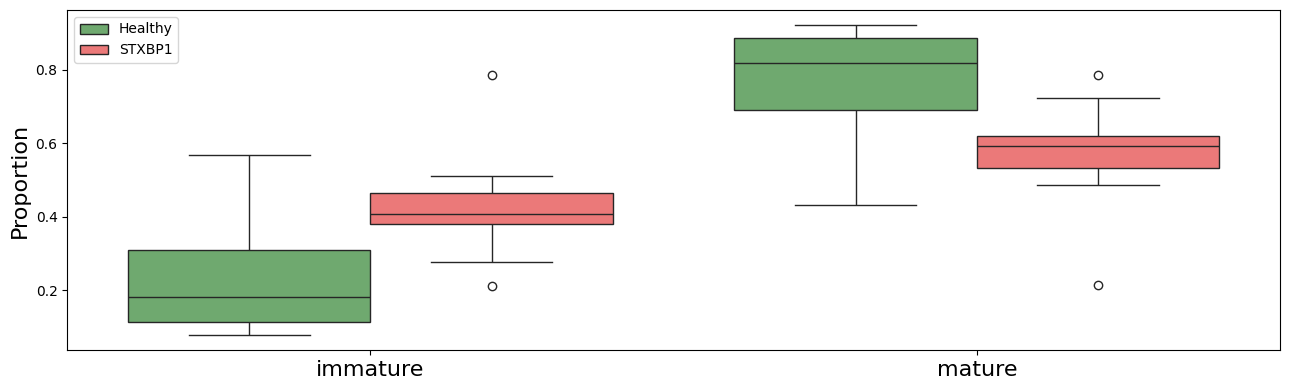

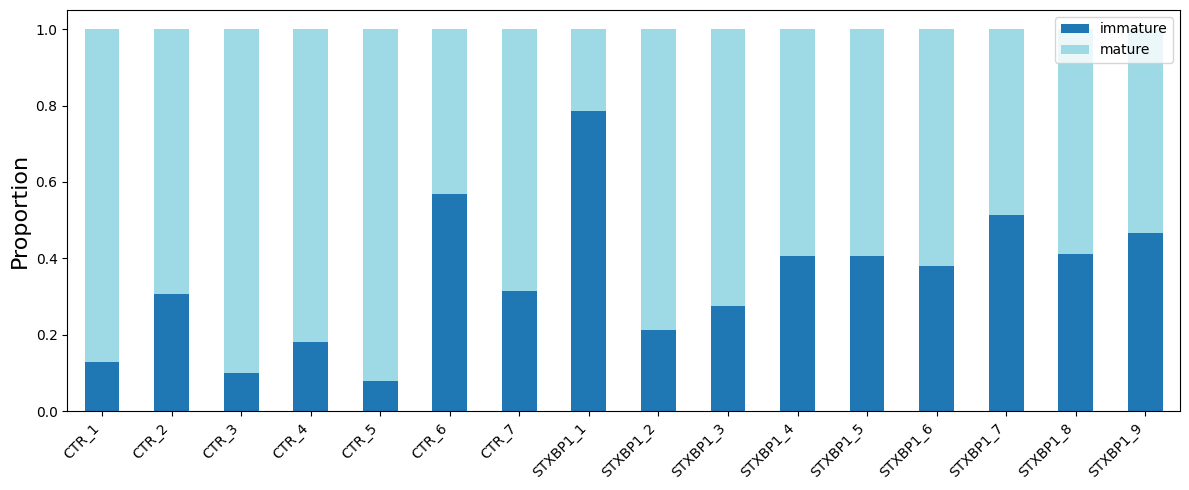

  cell_type  mannwhitney_p  perm_p  control_mean  sick_mean
0  immature       0.041783   0.043        0.2397   0.428969
1    mature       0.041783   0.026        0.7603   0.571031


In [28]:
# Step 2: Run count types analysis
df_counts, df_stats, (fig1, fig3) = proj_copy.analyze_cell_type_population(mode='relative', n_permutations=1000, x_label_size=label_size, y_label_size=label_size, save_path=figures_path, figsize=(13,4))

# Step 3: Show the plots
plt.show()

# Step 4: Optionally display the stats
print(df_stats)


## graph of cell types count

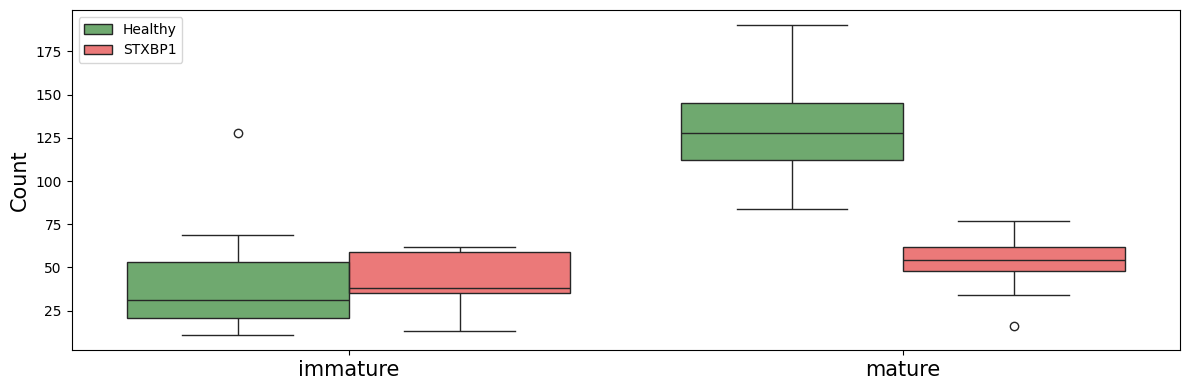

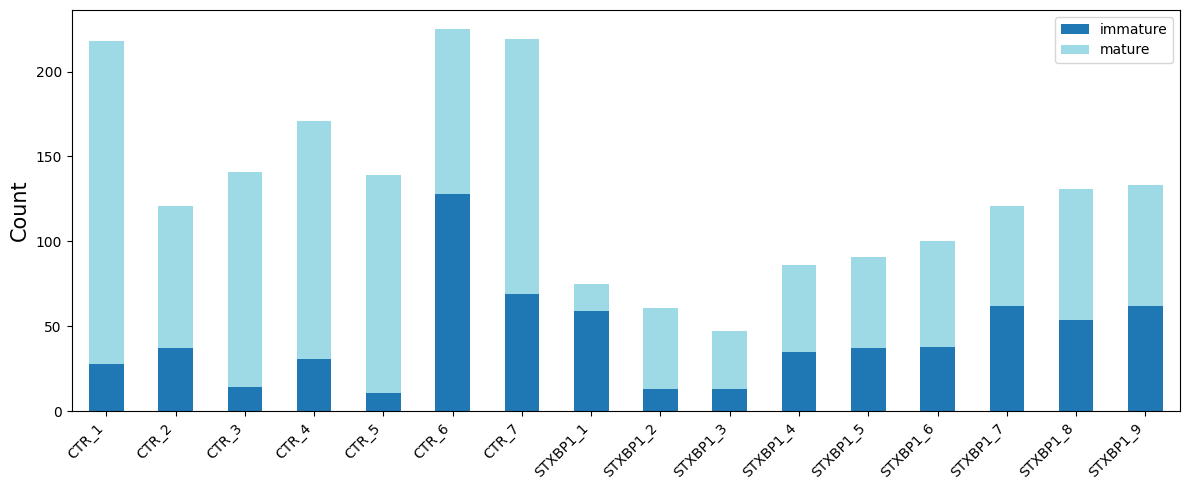

  cell_type  mannwhitney_p  perm_p  control_mean  sick_mean
0  immature       0.710415   0.821     45.428571  41.444444
1    mature       0.000175   0.000    130.857143  52.444444


In [12]:
# Step 2: Run count types analysis
df_counts, df_stats, (fig1, fig3) = proj_copy.analyze_cell_type_population(mode='absolute', n_permutations=1000, x_label_size=label_size, y_label_size=label_size, save_path=figures_path)

# Step 3: Show the plots
plt.show()

# Step 4: Optionally display the stats
print(df_stats)


## define functions for distribution along axis

In [47]:

def get_cumulative_distribution(data, cell_type):
    """
    Calculate the average cumulative distribution function (CDF) for a specific type across multiple samples.
    """
    cumulative_distributions = []

    for sample_name, df in data.items():
        signal = df[cell_type]
        cumulative = np.cumsum(signal) / np.sum(signal)
        cumulative_distributions.append(cumulative)

    mean_cumulative_distribution = np.mean(cumulative_distributions, axis=0)
    return mean_cumulative_distribution

def get_mean_hist(data, cell_type):

    signals = []
    for sample_name, df in data.items():
        sig = df[cell_type]
        signals.append(sig)
    # assume the signals are histograms values 
    mean_hist = np.mean(signals, axis=0)
    return mean_hist

def compute_ks_statistic(sick_data, control_data, cell_type, print_p=False):
    """
    Compute the Kolmogorov-Smirnov (KS) statistic for two groups (sick and control).
    """
    sick_cdf = get_cumulative_distribution(sick_data, cell_type)
    control_cdf = get_cumulative_distribution(control_data, cell_type)
    sick_hist = get_mean_hist(sick_data, cell_type)
    control_hist = get_mean_hist(control_data, cell_type)
    ks_statistic = np.max(np.abs(sick_cdf - control_cdf))
    if print_p:
        _, p_val = ks_2samp(sick_hist, control_hist)
        print("ks pval:", p_val)

    return ks_statistic, sick_cdf, control_cdf, sick_hist, control_hist
    

def plot_cumulative_distributions(sick_cdf, control_cdf, ks_statistic, bin_edges = NUM_BINS, cell_type = None, var_name=None, save_path=None, figsize=(6,5), fontsize=14):
    """
    Plot cumulative distributions for sick and control groups, highlighting the KS statistic.
    """
    if bin_edges == None:
        bin_edges = 50
    if np.isscalar(bin_edges):
        bin_edges = np.linspace(0, 1, bin_edges + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    fig, ax = plt.subplots(figsize=figsize)    
    ax.plot(bin_centers, sick_cdf, color="red")
    ax.plot(bin_centers, control_cdf, color="green")

    # Highlight the KS statistic
    max_diff_index = np.argmax(np.abs(sick_cdf - control_cdf))
    max_diff = sick_cdf[max_diff_index] - control_cdf[max_diff_index]
    ax.vlines(bin_centers[max_diff_index], control_cdf[max_diff_index], sick_cdf[max_diff_index], color="black", linestyle="--")
    print(f"KS Statistic: {ks_statistic:.3f}")
    ax.set_title(cell_type)

    ax.set_xlabel("Normalized 3D distance", fontsize=fontsize)
    ax.set_ylabel("Cumulative Probability", fontsize=fontsize)
    fig.show()
    if save_path is not None:
        fig.savefig(save_path + '/CDFs of Normalized 3D distance for ' + cell_type, dpi=300, bbox_inches="tight")


def plot_histograms(sick_hist, control_hist, title=None, save_path=None, figsize=(6,5)):

    # Plot the 2 histograms on the same graph
    n_points = len(sick_hist)
    
    bin_edges = np.linspace(0, 1, n_points + 1) 
    fig, ax = plt.subplots(figsize=figsize)
    ax.hist(bin_edges[:-1], bins=bin_edges, weights=control_hist, alpha=0.5, label='Healthy', color='green')
    ax.hist(bin_edges[:-1], bins=bin_edges, weights=sick_hist, alpha=0.5, label='STXBP1', color='red')
    ax.set_xlabel("Normalized 3D distance")
    ax.set_ylabel("Normalized distribution")
    ax.set_title(title)
    ax.legend(loc='upper left')
    fig.show()
    if save_path is not None:
        fig.savefig(save_path + '/Normalized 3D distance for ' + title, dpi=300, bbox_inches="tight")
    
    
# def get_pdf
#     """
#     Calculate the average probability density function (PDF) for a specific type across multiple samples.
#     """
#     pdfs = []

#     for sample_name, df in data.items():
#         signal = df[cell_type]
#         # scale power s.t. the integral over probabilities will be 1
#         signal = signal * len(signal)
#         pdfs.append(signal)

#     mean_pdf = np.mean(pdfs, axis=0)
#     # senity check
#     point_step = 1 / (len(signal))
#     print(f"integral over pdf is approximately {np.sum(signal) * point_step}")
#     return mean_pdf
    
# def plot_pdf(sick_pdf, control_pdf, bin_edges = None, cell_type = None, var_name='Z axis'):
#     """
#     Plot probability density functions for sick and control groups
#     """

#     if bin_edges == None:
#         bin_edges = 50
#     if np.isscalar(bin_edges):
#         bin_edges = np.linspace(0, 1, bin_edges + 1)    
#     bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
#     plt.plot(bin_centers, sick_pdf, label="Sick PDF", color="blue")
#     plt.plot(bin_centers, control_pdf, label="Control PDF", color="green")
#     plt.xlabel(var_name)
#     plt.ylabel("Probability Density")
#     plt.title(f"PDFs of type {cell_type} along {var_name}")
#     plt.legend()
#     plt.show()

In [48]:
def permutation_test(sick_data, control_data, cell_type, bin_edges=NUM_BINS, n_permutations=NUM_PERMUTATIONS, plot_data_cdfs=False, plot_permutation_dist=False, var_name = 'Z axis', save_path=None, figsize=(6,5), seed=1):
    """
    Conduct a permutation test for the KS statistic.
    """
    # Set seed
    np.random.seed(seed)
    
    # Compute observed KS statistic
    observed_statistic, sick_cdf, control_cdf, sick_hist, control_hist = compute_ks_statistic(sick_data, control_data, cell_type, print_p=True)

    # Combine all data
    all_data = {**sick_data, **control_data}
    all_sample_names = list(all_data.keys())
    n_sick = len(sick_data)

    permuted_stats = []
    for _ in range(n_permutations):
        np.random.shuffle(all_sample_names)
        permuted_sick = {name: all_data[name] for name in all_sample_names[:n_sick]}
        permuted_control = {name: all_data[name] for name in all_sample_names[n_sick:]}

        permuted_statistic, _, _, _, _ = compute_ks_statistic(permuted_sick, permuted_control, cell_type)
        permuted_stats.append(permuted_statistic)

    # Calculate p-value assuming normal distribution of permuted statistics
    mean_stat = np.mean(permuted_stats)
    std_stat = np.std(permuted_stats)
    z_p_value = 1 - norm.cdf(observed_statistic, loc=mean_stat, scale=std_stat)
    direct_p_value = sum(permuted_stats>=observed_statistic)/(1+n_permutations)
 
    if plot_data_cdfs:
        plot_cumulative_distributions(sick_cdf, control_cdf, observed_statistic, bin_edges, cell_type, var_name, save_path, figsize=figsize)
        plot_histograms(sick_hist, control_hist, title=cell_type, save_path=save_path, figsize=figsize)
        
    if plot_permutation_dist:
        # Plot histogram of permuted statistics 
        plt.figure(figsize=figsize)
        plt.hist(permuted_stats, bins=30, alpha=0.6, color="gray")
        
        # Print observed statistic
        plt.axvline(observed_statistic, color="red", linestyle="--")
        print(f"For type {cell_type} with {n_permutations} permutations, we got direct_p-value of: {direct_p_value:.3e}")
        
        plt.xlabel("KS Statistic")
        plt.ylabel("Counts")
        plt.title(f"Permutation Test of KS-statistic for type {cell_type}")
        plt.show()
        if save_path is not None:
            plt.savefig(save_path + '/perm test of radial dist for type ' + cell_type, dpi=300, bbox_inches="tight")


    return observed_statistic, z_p_value, direct_p_value, 

## Types distribution along r axis - spherical

### graph for each sample

C:\mnt/data\exseq_kit\objects\project_object.py:305: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\mnt/data\exseq_kit\objects\project_object.py:305: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\mnt/data\exseq_kit\objects\project_object.py:305: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\mnt/data\exseq_kit\objects\project_object.py:305: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\mnt/data\exseq_kit\objects\project_object.py:305: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\mnt/data\exseq_kit\objects\project_object.py:305: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\mnt/data\exseq_kit\objects\project_object.py:305: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f

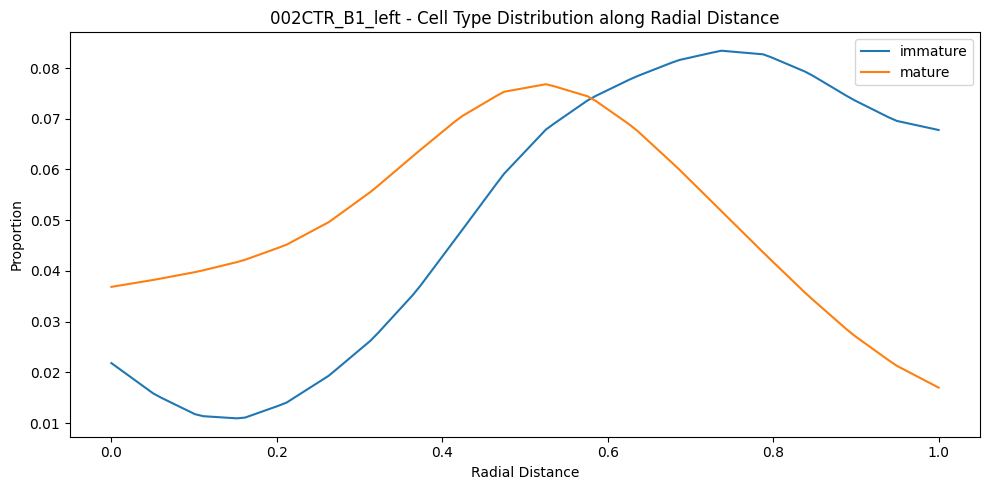

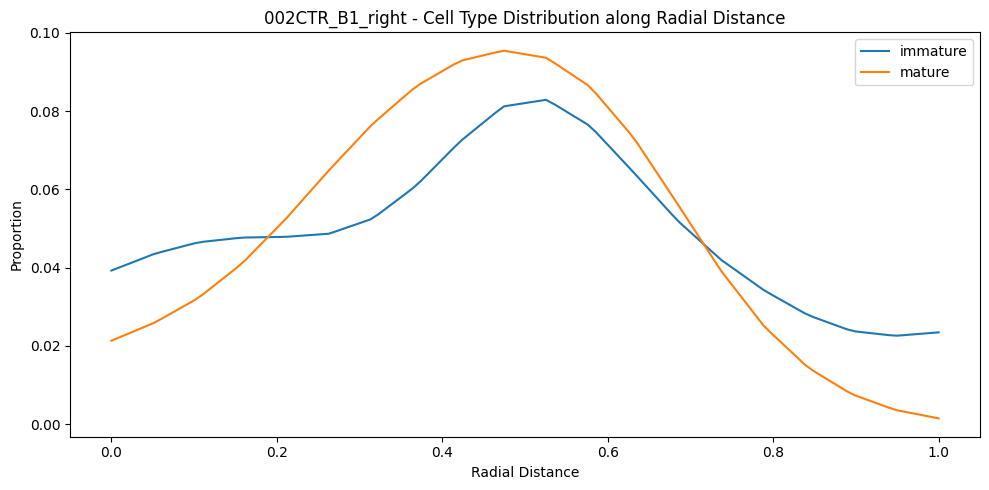

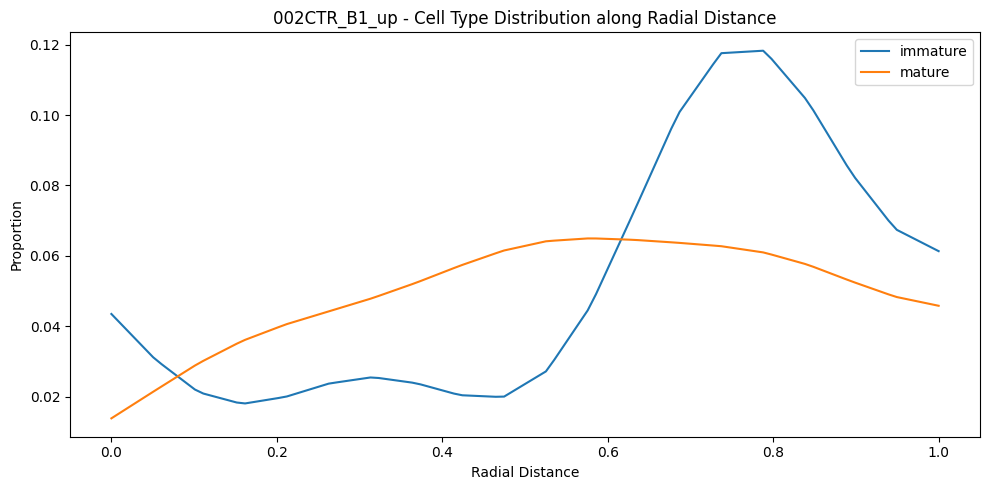

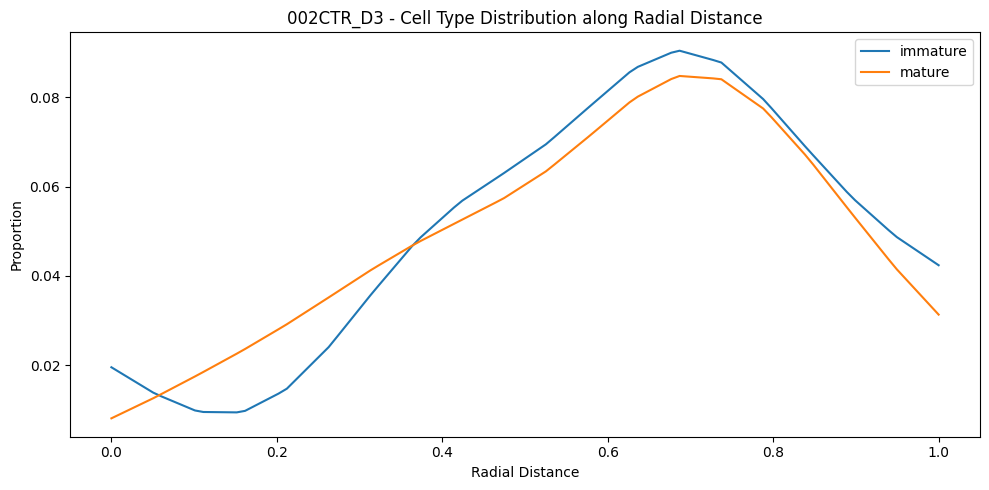

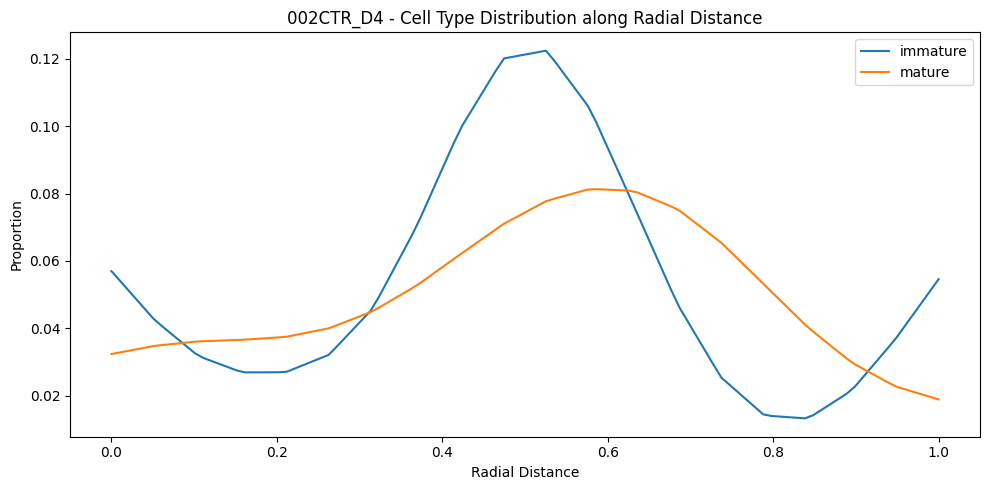

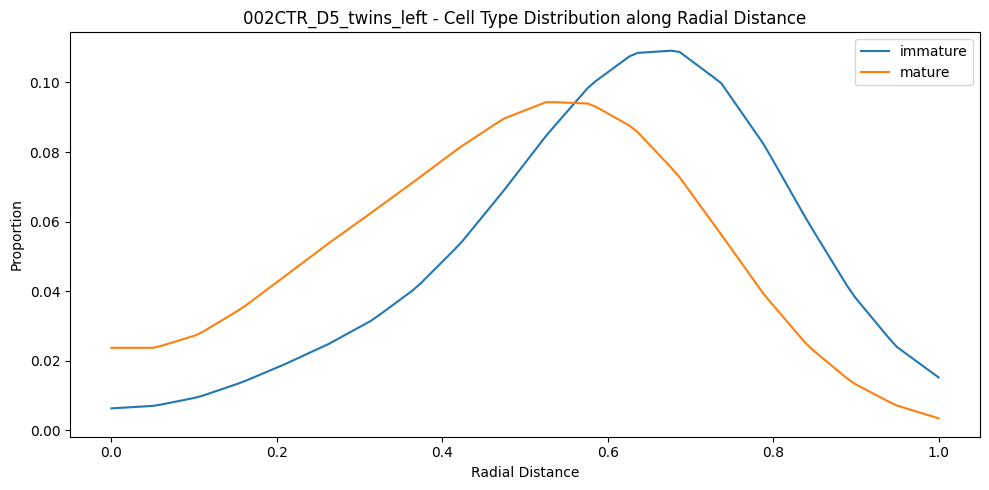

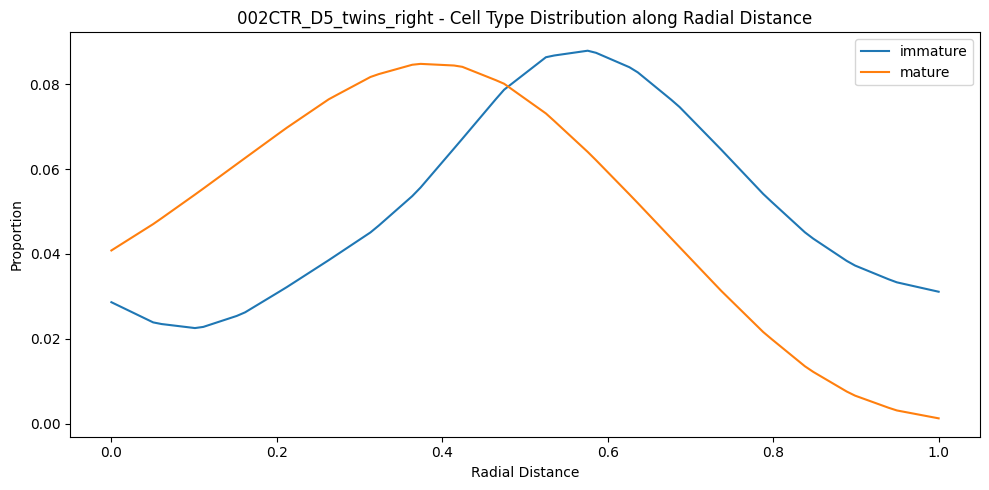

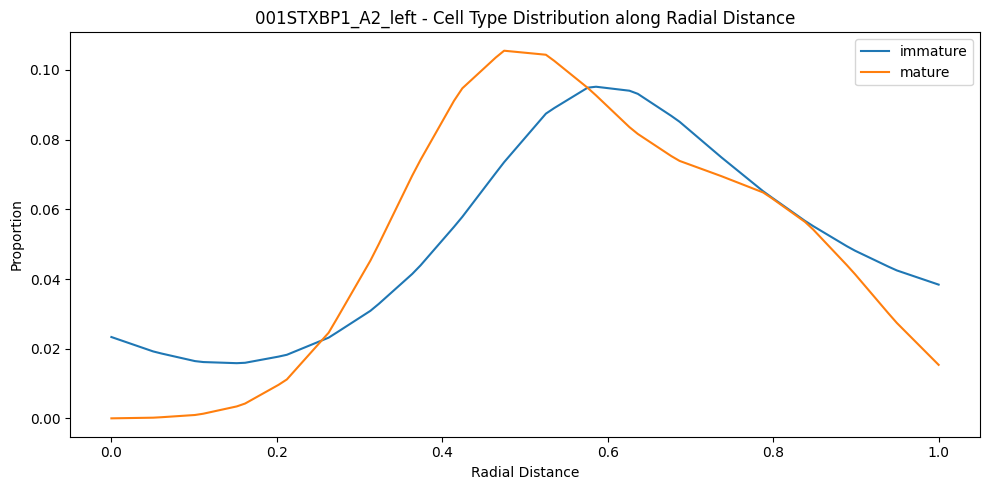

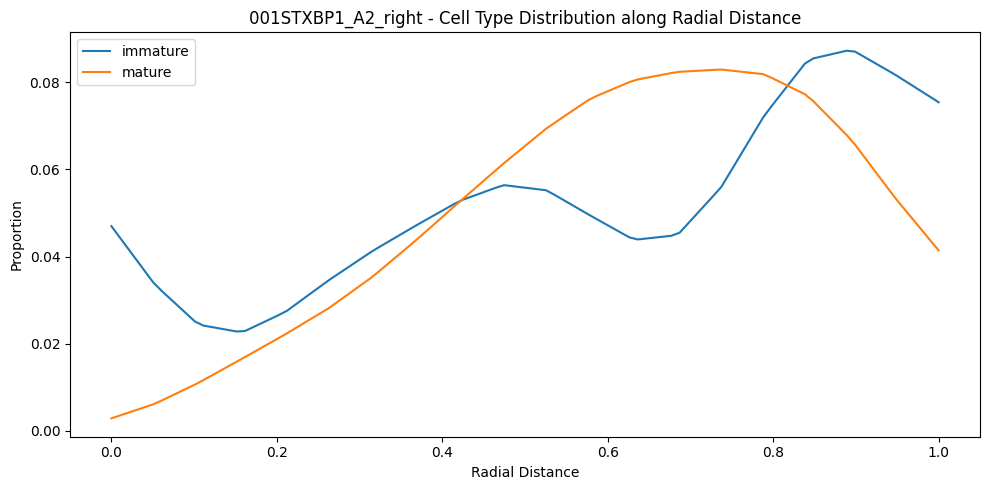

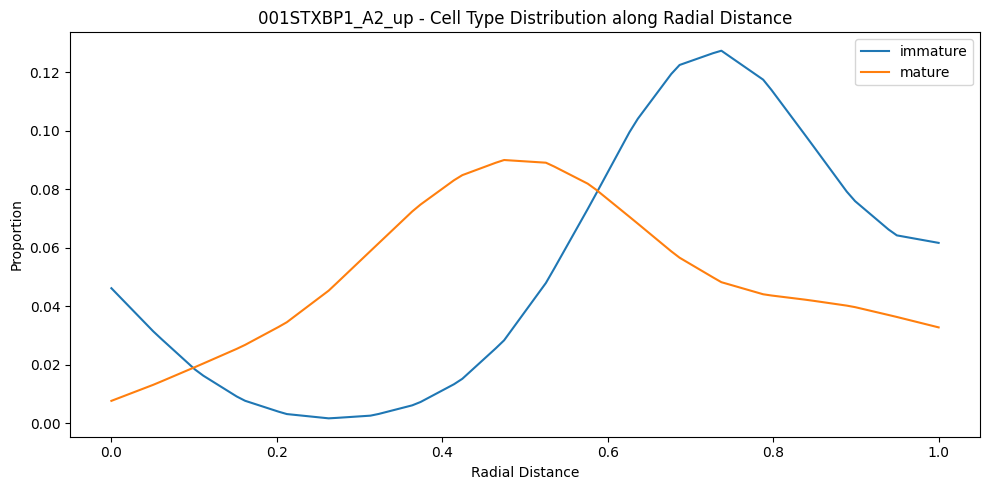

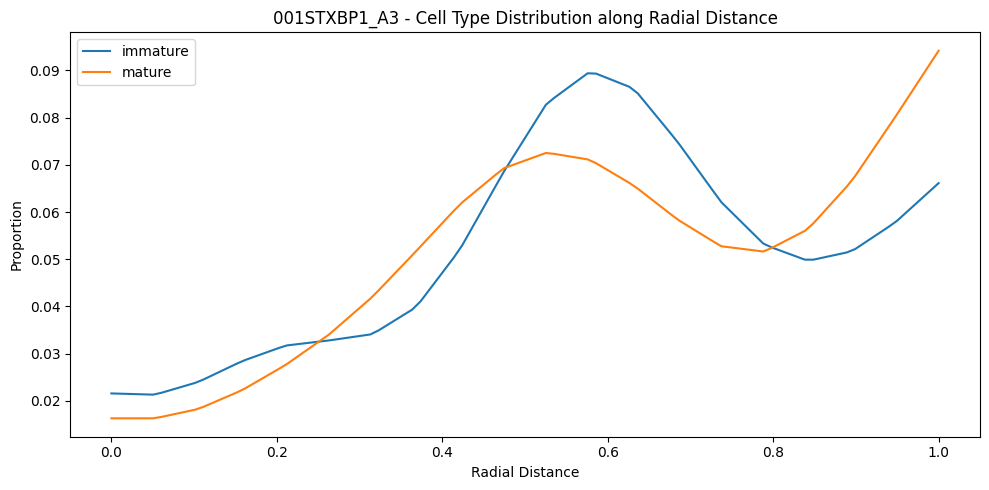

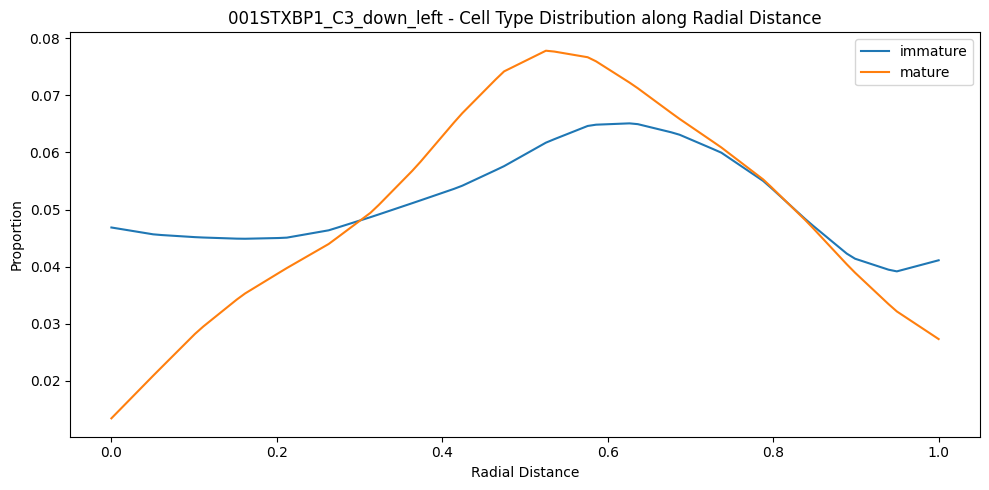

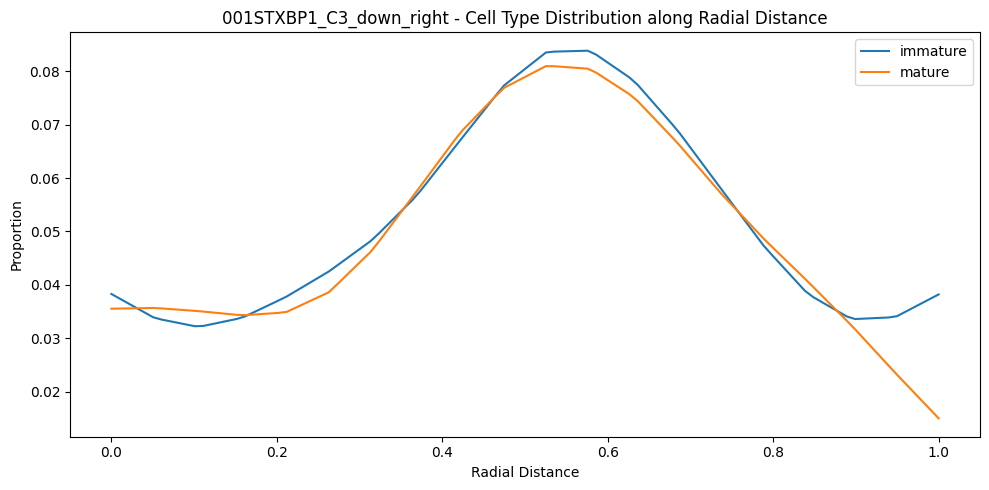

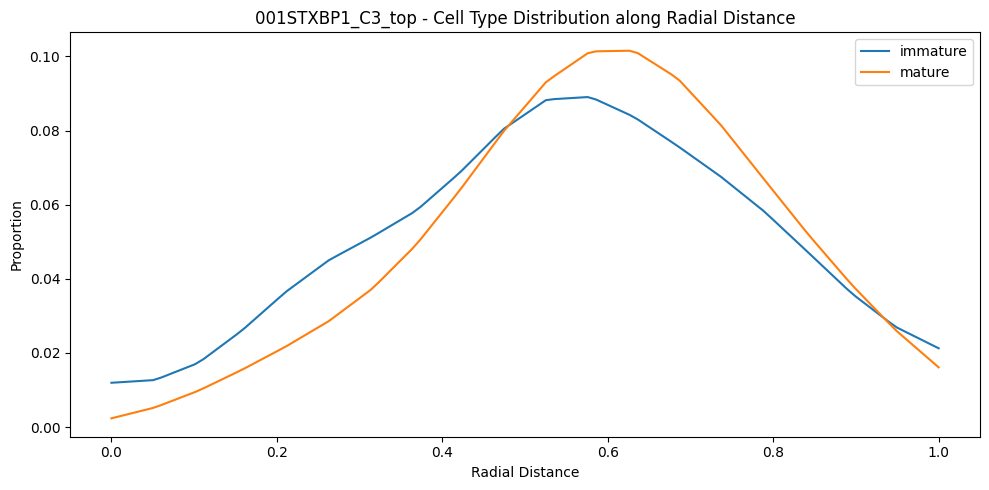

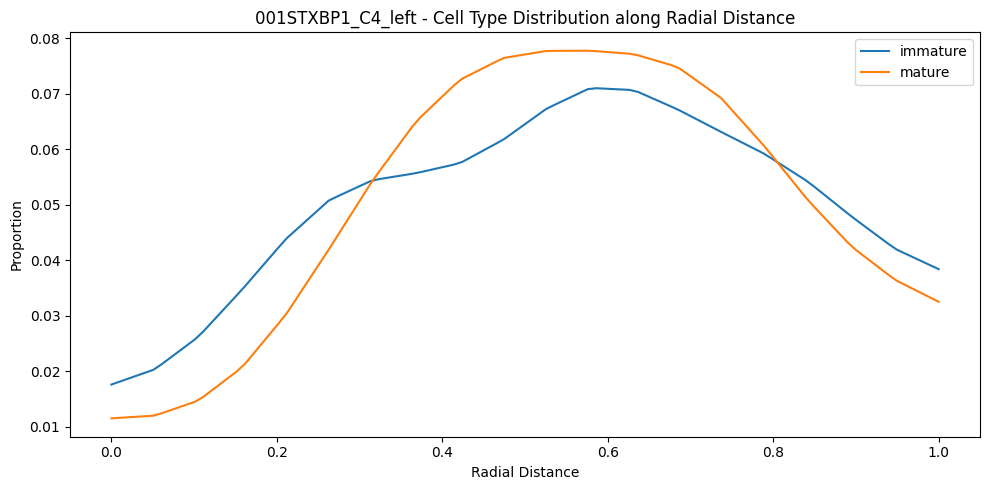

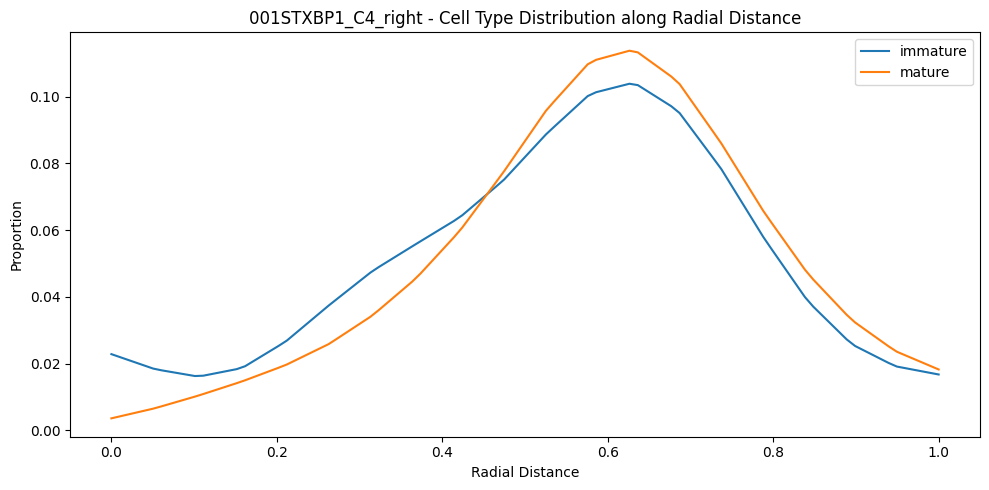

In [31]:
control_data, sick_data = proj_copy.analyze_cell_distribution_along_axis(num_bins = NUM_BINS, normalize_counts=True, normalize_axis=True, bandwidth=2, show_histogram=False, radial='spherical')

### Condition analysis - graphs

In [32]:
from scipy.special import comb
N = len(control_data) + len(sick_data)
K = len(sick_data)
print("the num of combinations: ", comb(N, K))


the num of combinations:  11440.0


ks pval: 0.9831368772656193
KS Statistic: 0.047


C:\Users\Moshe\AppData\Local\Temp\ipykernel_22700\1294276092.py:63: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Moshe\AppData\Local\Temp\ipykernel_22700\1294276092.py:81: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


For type immature with 10000 permutations, we got direct_p-value of: 8.932e-01


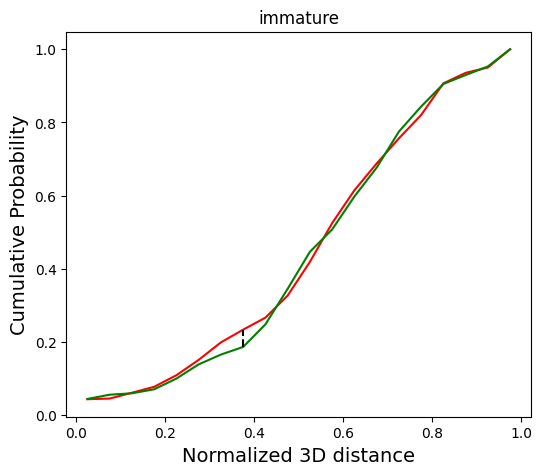

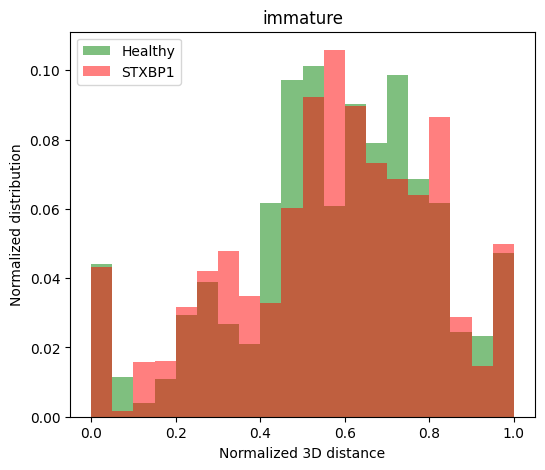

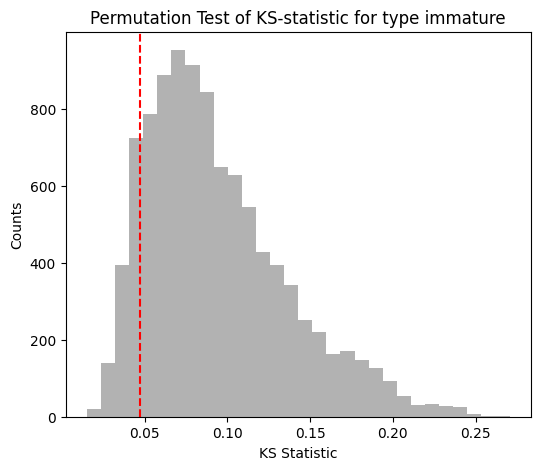

ks pval: 0.571336004933722
KS Statistic: 0.149
For type mature with 10000 permutations, we got direct_p-value of: 2.610e-02


<Figure size 640x480 with 0 Axes>

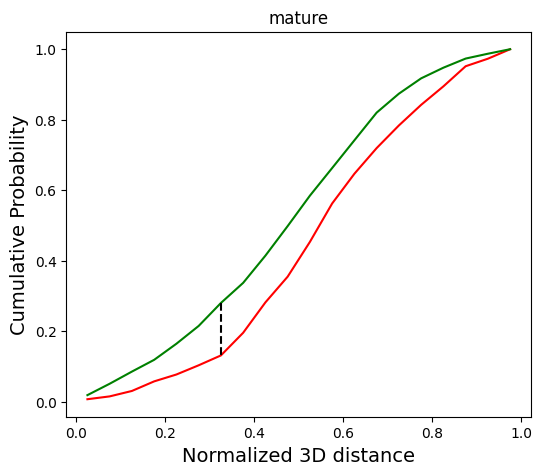

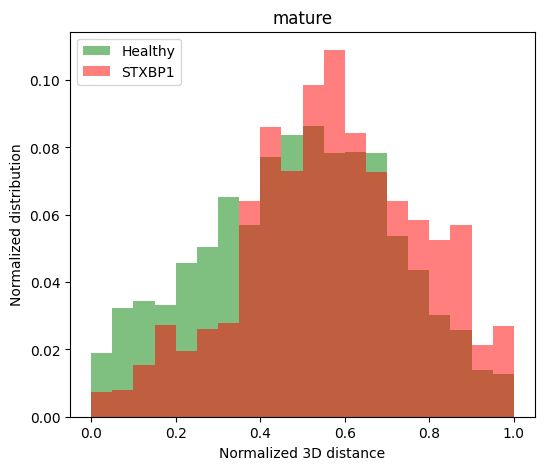

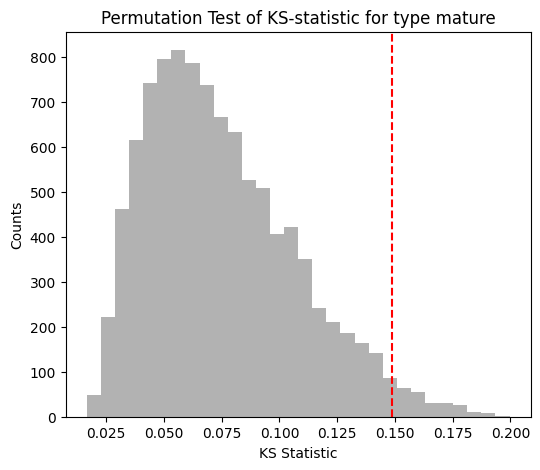

,type,KS-stat,P-value (straight calc),P-value (normal assumption)
0,immature,0.047230,0.893211,0.862350
1,mature,0.148762,0.026097,0.011147


<Figure size 640x480 with 0 Axes>

In [49]:

results = []
for ct in ['immature', 'mature']:
    observed_stat, z_p_val, str_p_val = permutation_test(sick_data, control_data, cell_type=ct, plot_data_cdfs=True, plot_permutation_dist=True, var_name='radial distance (3D)', save_path=figures_path, seed=1)
    results.append({
        "type": ct,
        "KS-stat": observed_stat,
        "P-value (straight calc)": str_p_val,
        "P-value (normal assumption)": z_p_val  
    })

res_df = pd.DataFrame(results)
res_df

In [18]:
pvals = res_df['P-value (straight calc)']
from statsmodels.sandbox.stats.multicomp import multipletests
adj_pvals = multipletests(pvals, method='fdr_bh')[1]
adj_pvals

array([0.89321068, 0.05219478])

In [19]:
# p values of chi2 for join counts on the cell types
table_jc = pd.read_csv(os.path.join(folder, "celltype_spatial_stats_all_samples.csv"))
table_jc.columns

Index(['cell_type', 'Moran_I', 'Moran_z', 'Moran_p', 'JC_BB', 'JC_BW', 'JC_WW',
       'JC_BB_p', 'JC_BB_dir', 'JC_chi2', 'JC_chi2_p', 'JC_p_sim_chi2',
       'weight_method', 'weight_param', 'n_cells', 'n_ones', 'sample'],
      dtype='object')

In [20]:
# table_jc = table_jc[table_jc['cell_type'] == 'immature']
JC_p = table_jc.JC_BB_p
table_jc['JC_p_adj'] = multipletests(JC_p, method='fdr_bh')[1]
table_jc[['cell_type', 'JC_p_adj', 'sample', 'n_cells']]


,cell_type,JC_p_adj,sample,n_cells
0,mature,0.364587,001STXBP1_A2_left,173
1,immature,0.578477,001STXBP1_A2_left,173
2,immature,0.849100,001STXBP1_A2_right,101
3,mature,0.058092,001STXBP1_A2_right,101
4,mature,0.000291,001STXBP1_A2_up,98
5,immature,0.249821,001STXBP1_A2_up,98
6,immature,0.013824,001STXBP1_A3,165
7,mature,0.000291,001STXBP1_A3,165
8,immature,0.000160,001STXBP1_C3_down_left,224
9,mature,0.000160,001STXBP1_C3_down_left,224


In [21]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# 2. הכנת משתנים קטגוריאליים
# יצירת עמודת 'תנאי'
table_jc['condition'] = np.where(table_jc['sample'].str.contains('STX'), 'STX', 'CTR')
# יצירת עמודת 'מובהקות' (התוצאה שאותה אנו מודדים)
table_jc['is_significant'] = (table_jc['JC_p_adj'] < 0.05).astype(int) # 1=מובהק, 0=לא מובהק

# 3. הגדרת סטטיסטי המבחן: שימוש בערך Chi-Square
def calculate_chi2(data):
    """מחשבת את סטטיסטי Chi-Square מלוח שכיחות 2x2."""
    contingency_table = pd.crosstab(data['condition'], data['is_significant'])
    # chi2_contingency מחזירה (chi2, p, dof, expected) - אנו מעוניינים רק בסטטיסטי
    chi2, _, _, _ = chi2_contingency(contingency_table)
    return chi2

# 4. חישוב סטטיסטי המבחן הנצפה
chi2_observed = calculate_chi2(table_jc)

# 5. ביצוע מבחן הפרמוטציות
N_PERMUTATIONS = 10000
chi2_permutations = []

# מערך של תוויות התנאי (CTR/STX) שאותן נערבב
condition_labels = table_jc['condition'].values

for i in range(N_PERMUTATIONS):
    # ערבוב התוויות של התנאי (שמירה על גודל הקבוצות המקורי)
    np.random.shuffle(condition_labels)
    
    # יצירת דאטאפריים מעורבב (החלפת עמודת condition בתוויות המעורבבות)
    permuted_data = table_jc.copy()
    permuted_data['condition'] = condition_labels
    
    # חישוב סטטיסטי Chi-Square עבור הנתונים המעורבבים
    chi2_permuted = calculate_chi2(permuted_data)
    chi2_permutations.append(chi2_permuted)

# 6. חישוב ערך P
# ערך P הוא הפרופורציה של הפרמוטציות שבהן הסטטיסטי היה קיצוני (גדול) לפחות כמו הנצפה
p_value_perm = np.sum(np.array(chi2_permutations) >= chi2_observed) / N_PERMUTATIONS

# 7. הצגת התוצאות
print(f"סטטיסטי Chi-Square נצפה: {chi2_observed:.4f}")
print(f"מספר פרמוטציות: {N_PERMUTATIONS}")
print(f"ערך P (מבחן פרמוטציות): {p_value_perm:.4f}")

# מסקנה
alpha = 0.05
if p_value_perm < alpha:
    print(f"\nמסקנה: דוחים את השערת האפס (P < {alpha}). יש קשר מובהק סטטיסטית בין התנאי לבין המובהקות.")
else:
    print(f"\nמסקנה: לא דוחים את השערת האפס (P >= {alpha}). אין קשר מובהק סטטיסטית בין התנאי לבין המובהקות.")

סטטיסטי Chi-Square נצפה: 1.8141
מספר פרמוטציות: 10000
ערך P (מבחן פרמוטציות): 0.1030

מסקנה: לא דוחים את השערת האפס (P >= 0.05). אין קשר מובהק סטטיסטית בין התנאי לבין המובהקות.


## Types distribution along z axis 

### graph for each sample

C:\mnt/data\exseq_kit\objects\project_object.py:305: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()


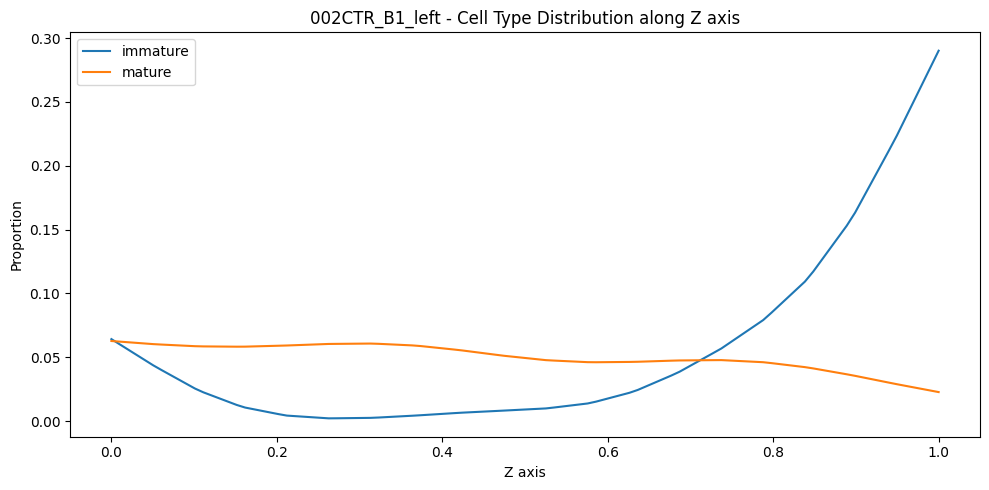

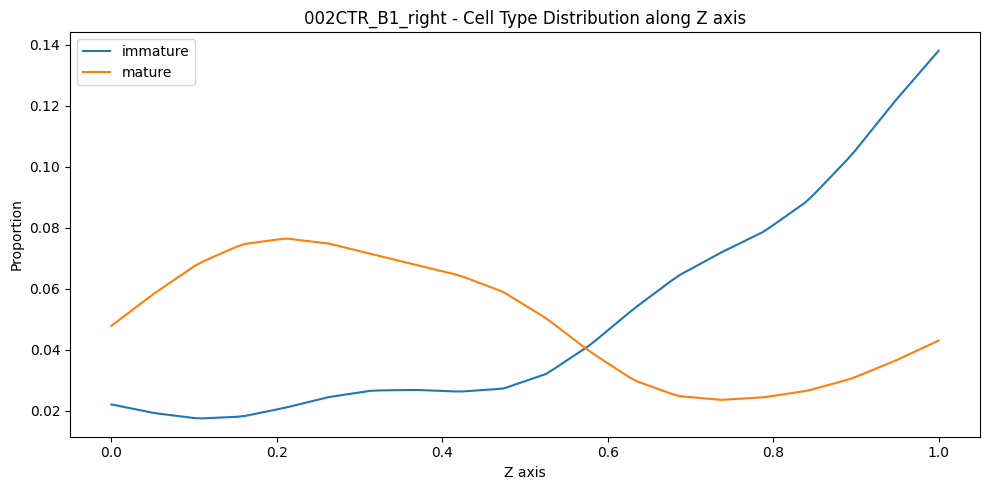

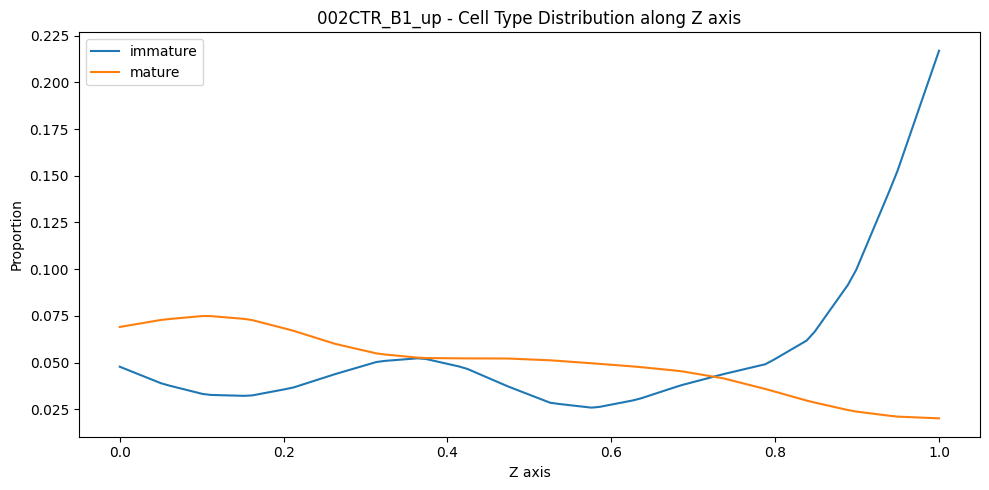

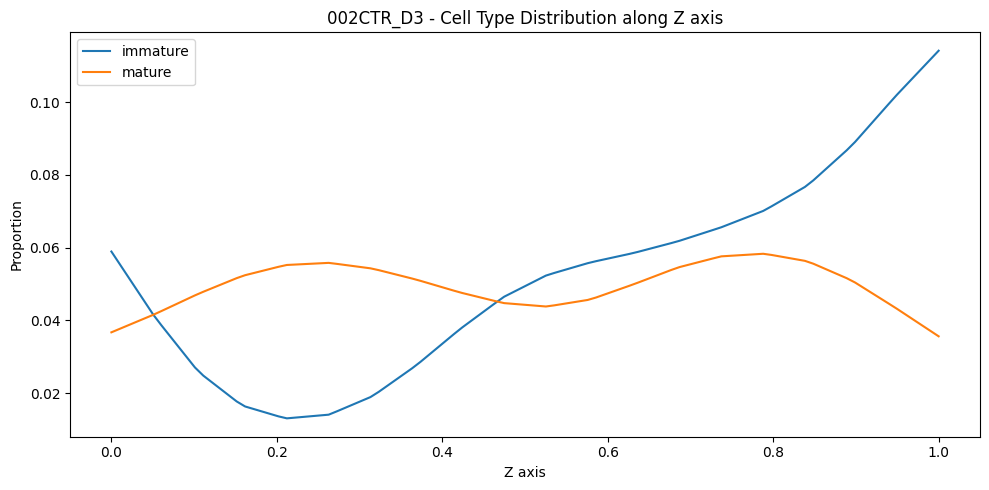

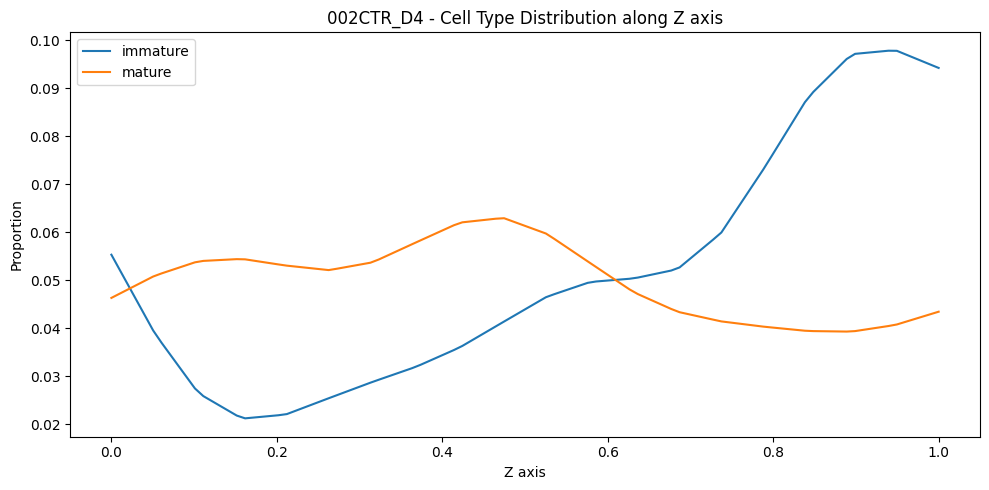

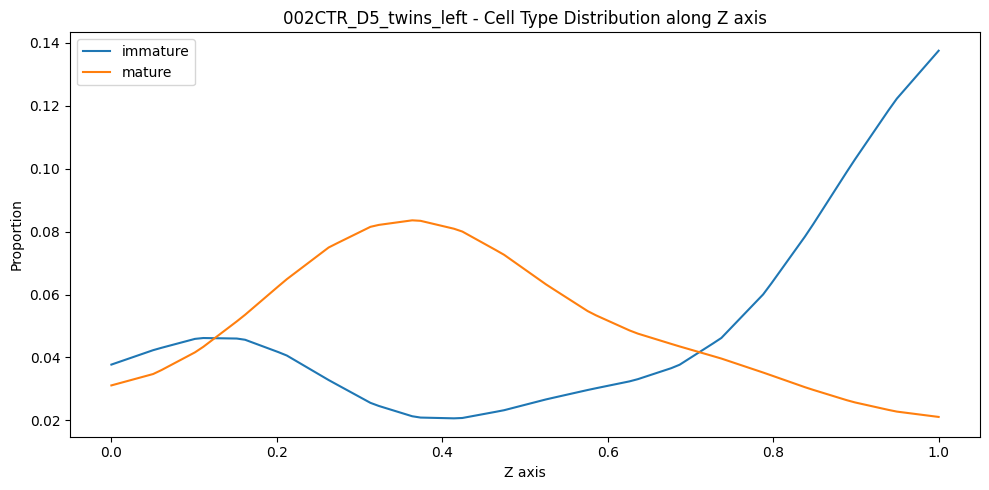

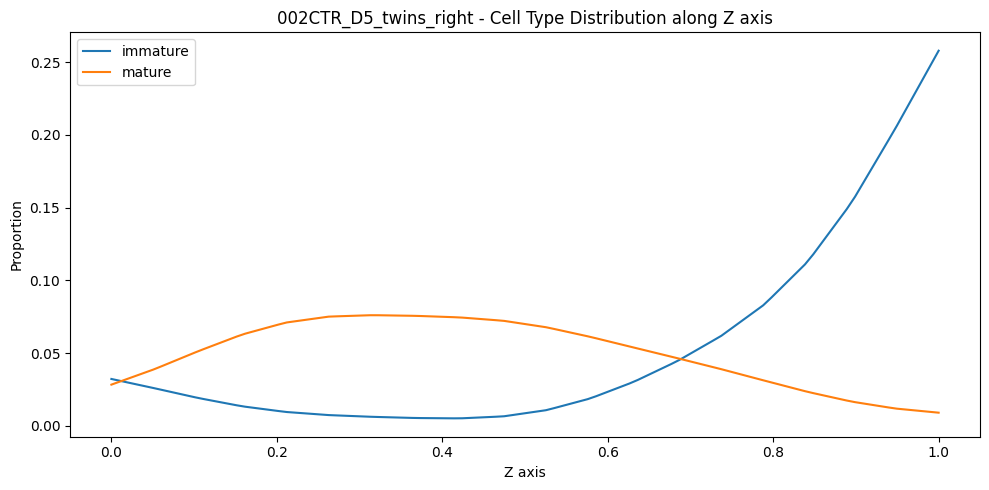

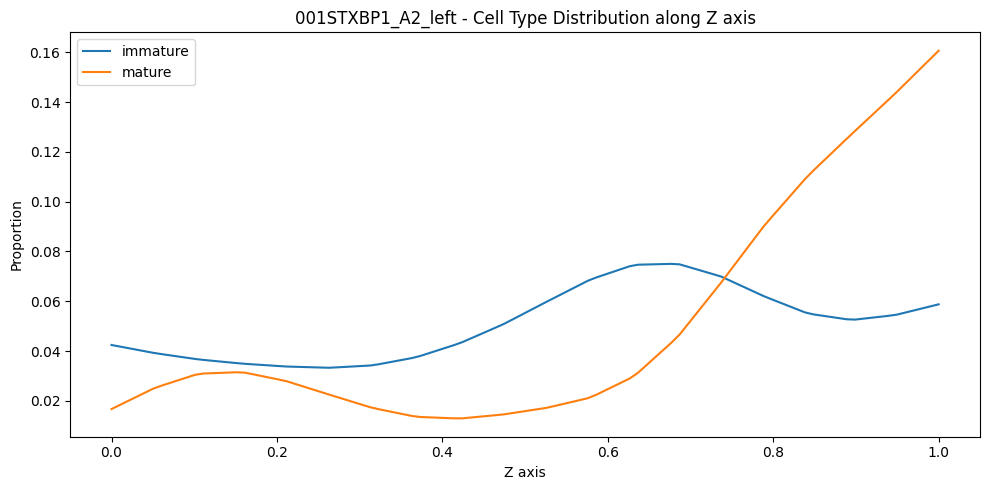

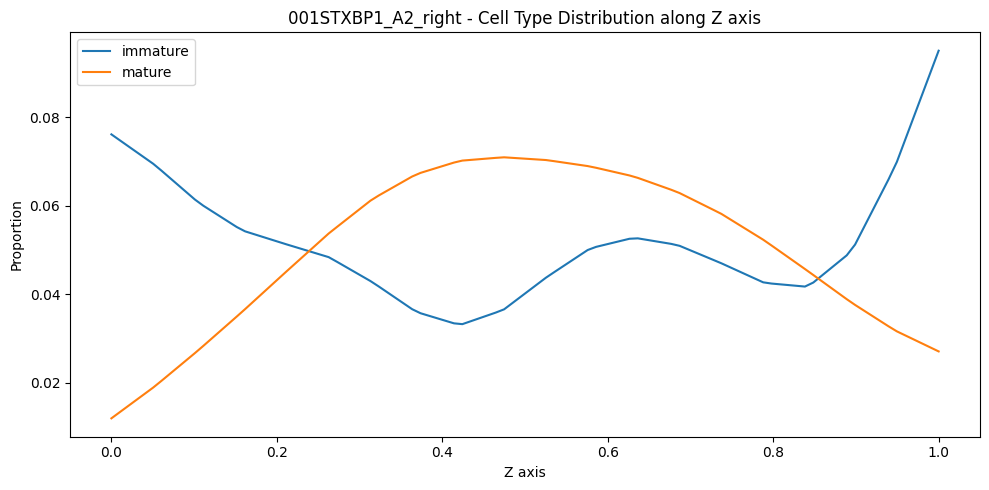

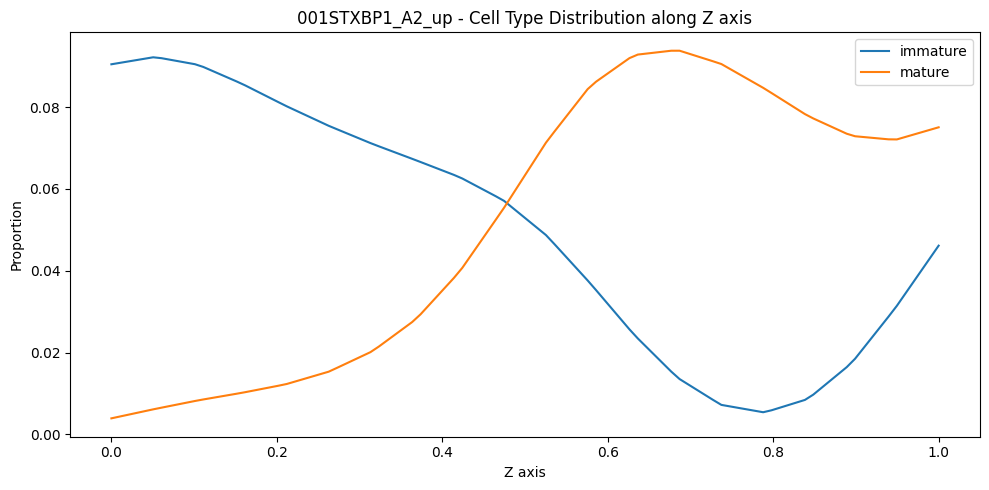

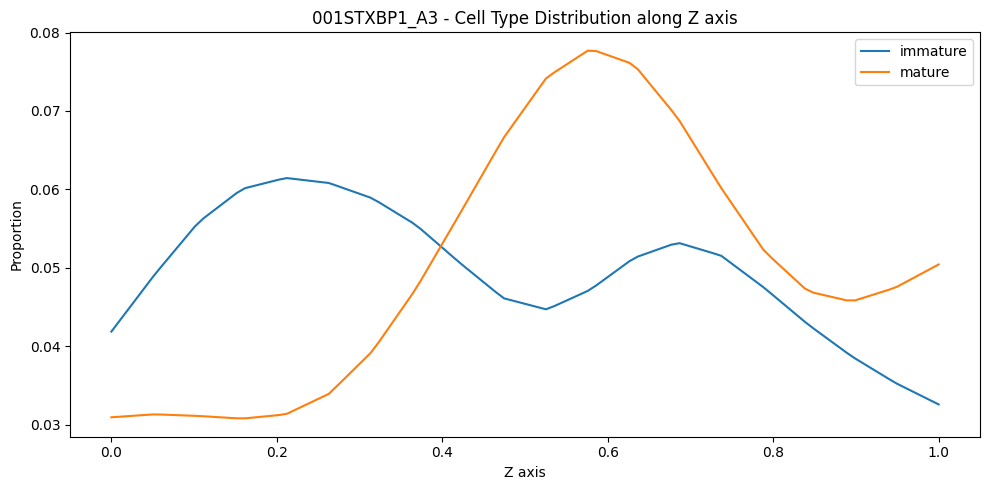

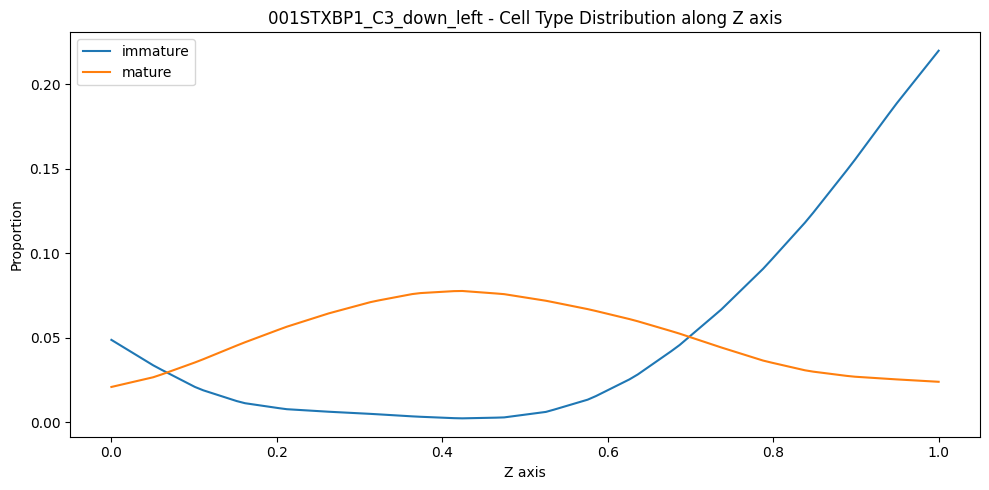

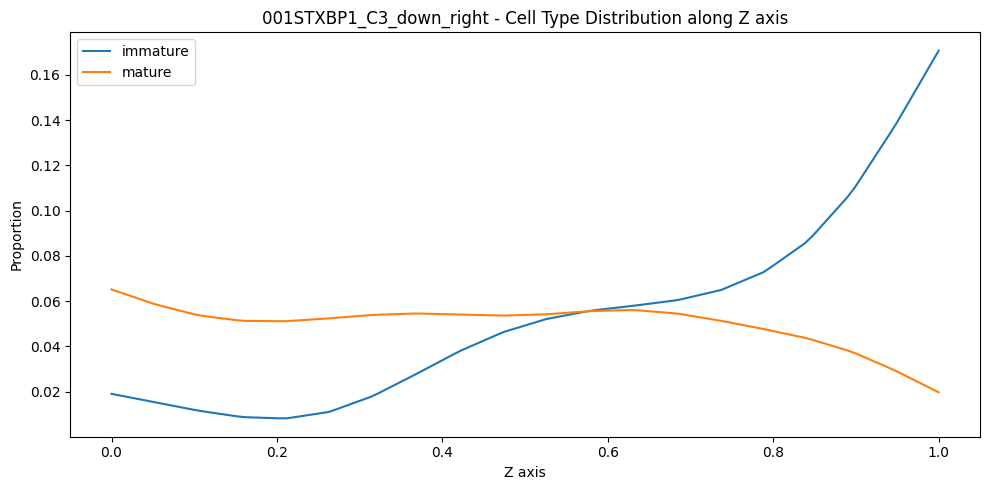

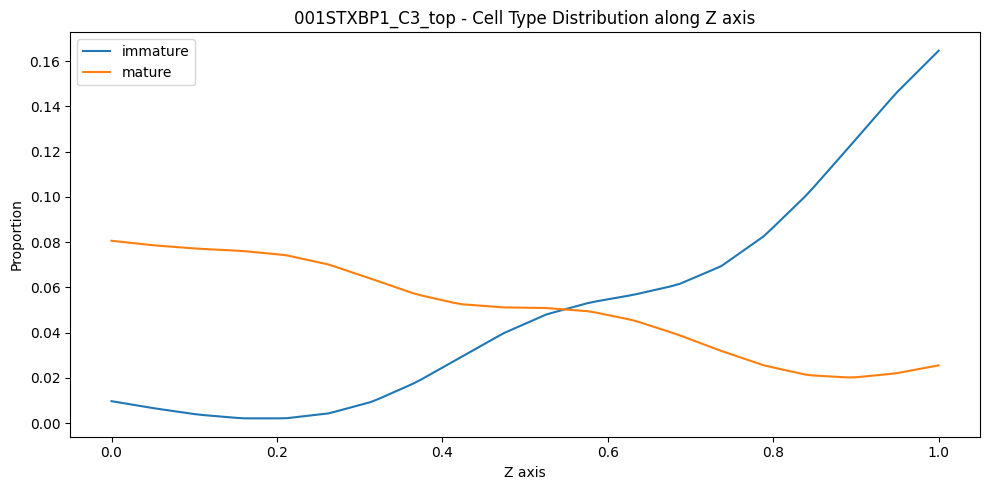

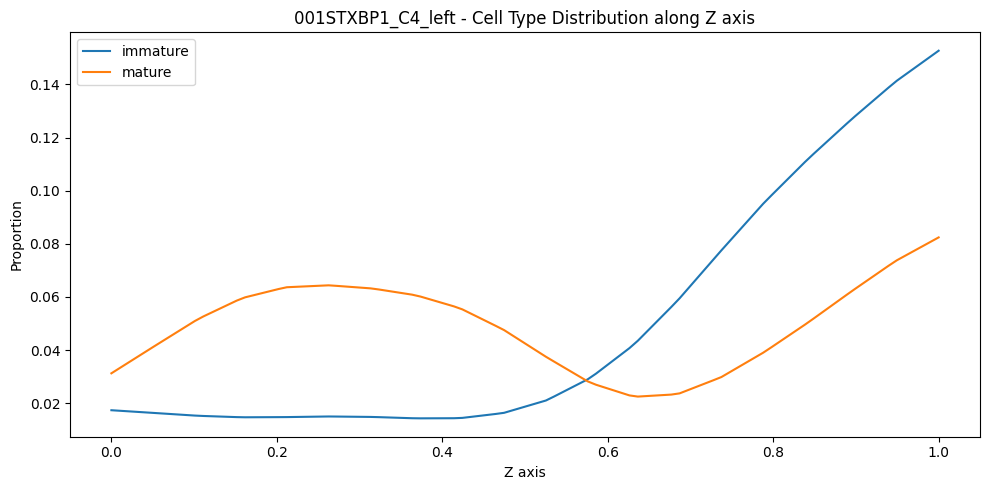

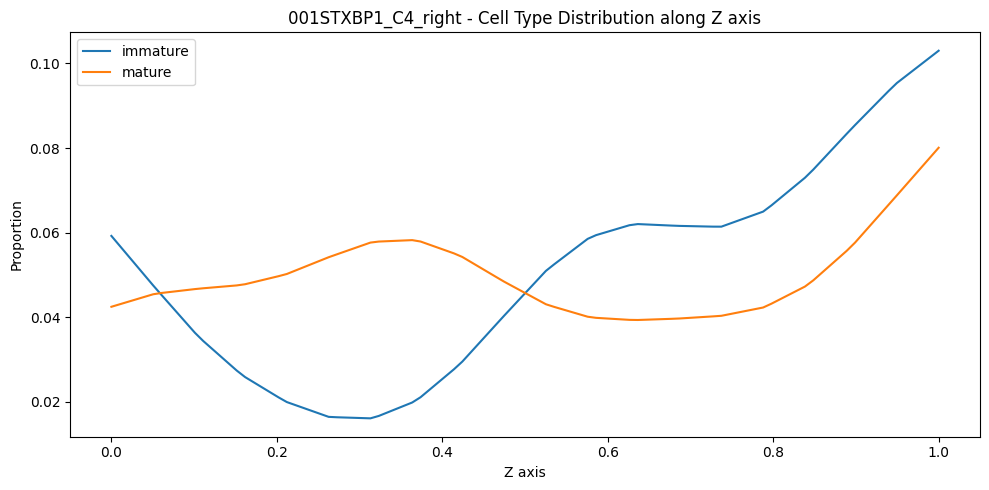

In [22]:
control_data, sick_data = proj_copy.analyze_cell_distribution_along_axis(num_bins = NUM_BINS, normalize_counts=True, normalize_axis=True, bandwidth=2, show_histogram=False)

### Condition analysis - graphs

ks pval: 0.08105771161340149
KS Statistic: 0.152


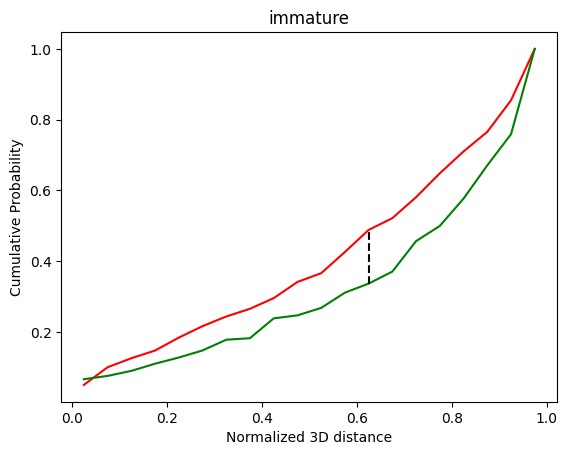

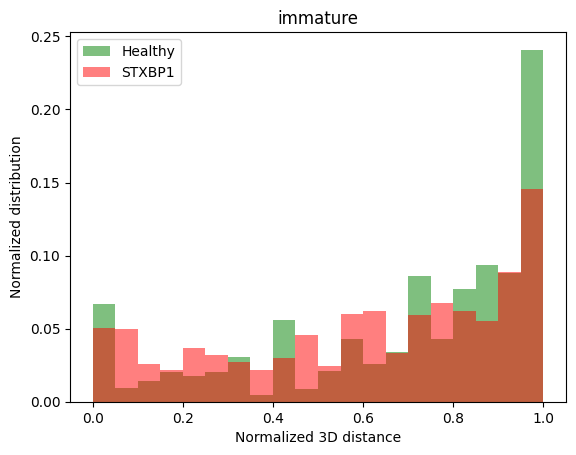

For type immature with 10000 permutations, we got direct_p-value of: 2.519e-01


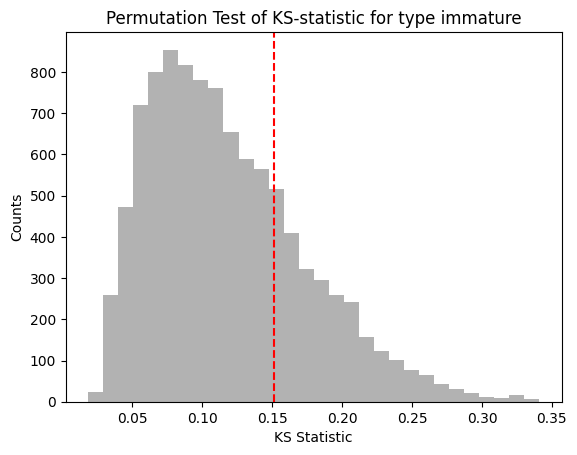

ks pval: 0.571336004933722
KS Statistic: 0.169


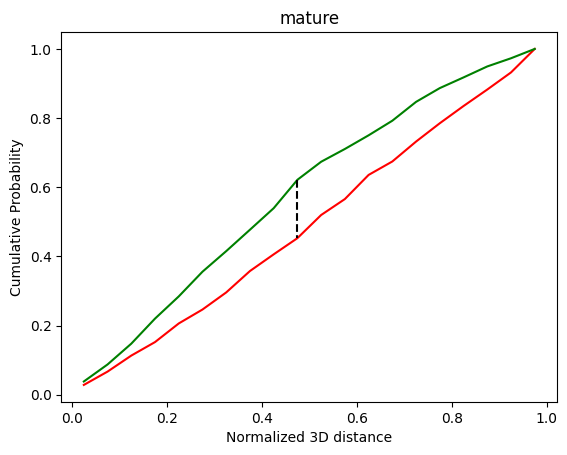

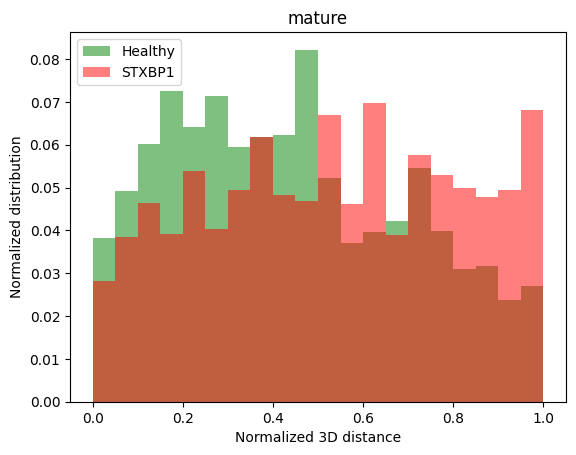

For type mature with 10000 permutations, we got direct_p-value of: 3.480e-02


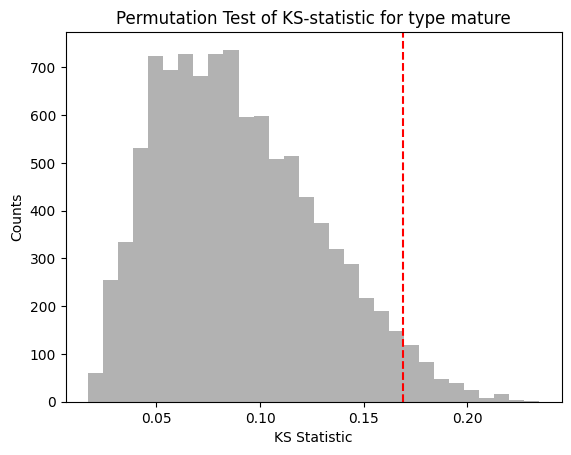

,type,KS-stat,P-value (straight calc),P-value (normal assumption)
0,immature,0.151551,0.251875,0.273345
1,mature,0.168804,0.034797,0.021029


In [23]:

results = []
for ct in ['immature', 'mature']:
    observed_stat, z_p_val, str_p_val = permutation_test(sick_data, control_data, cell_type=ct, plot_data_cdfs=True, plot_permutation_dist=True, var_name='radial distance (3D)', seed=1)
    results.append({
        "type": ct,
        "KS-stat": observed_stat,
        "P-value (straight calc)": str_p_val,
        "P-value (normal assumption)": z_p_val  
    })

res_df = pd.DataFrame(results)
res_df

## Types distribution along r axis - spherical, bin cells by volume

### graph for each sample

C:\mnt/data\exseq_kit\objects\project_object.py:305: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\mnt/data\exseq_kit\objects\project_object.py:305: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\mnt/data\exseq_kit\objects\project_object.py:305: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\mnt/data\exseq_kit\objects\project_object.py:305: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\mnt/data\exseq_kit\objects\project_object.py:305: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\mnt/data\exseq_kit\objects\project_object.py:305: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\mnt/data\exseq_kit\objects\project_object.py:305: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f

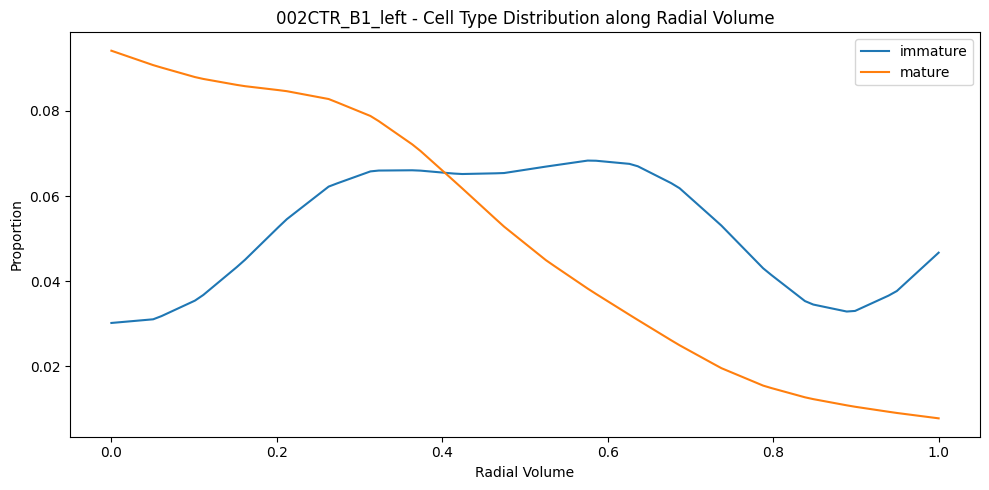

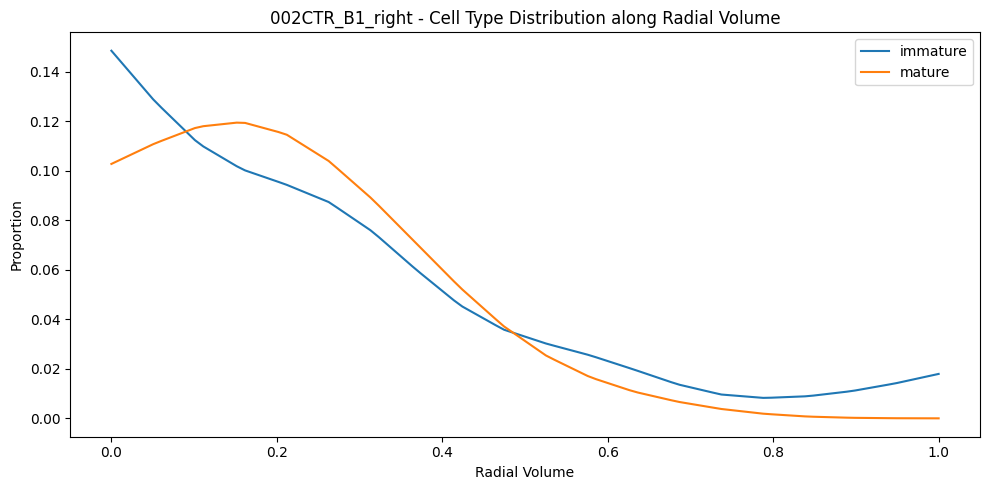

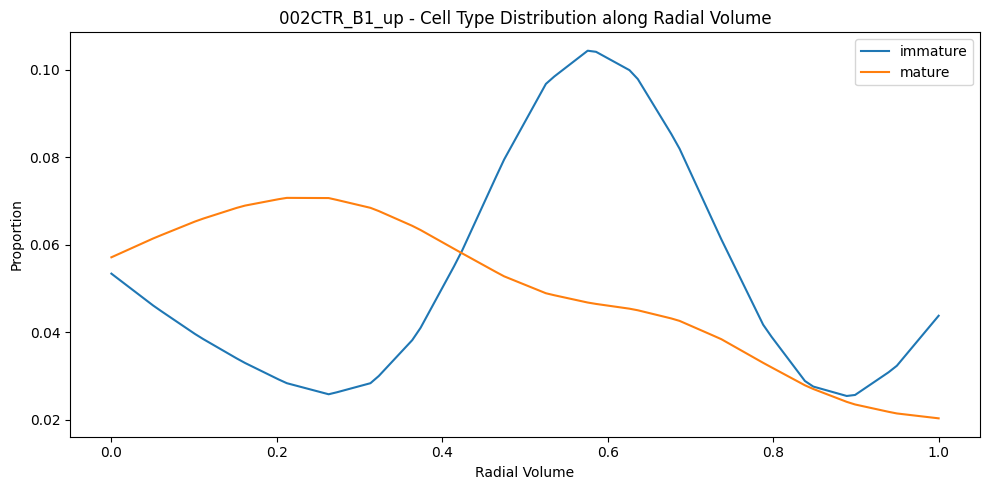

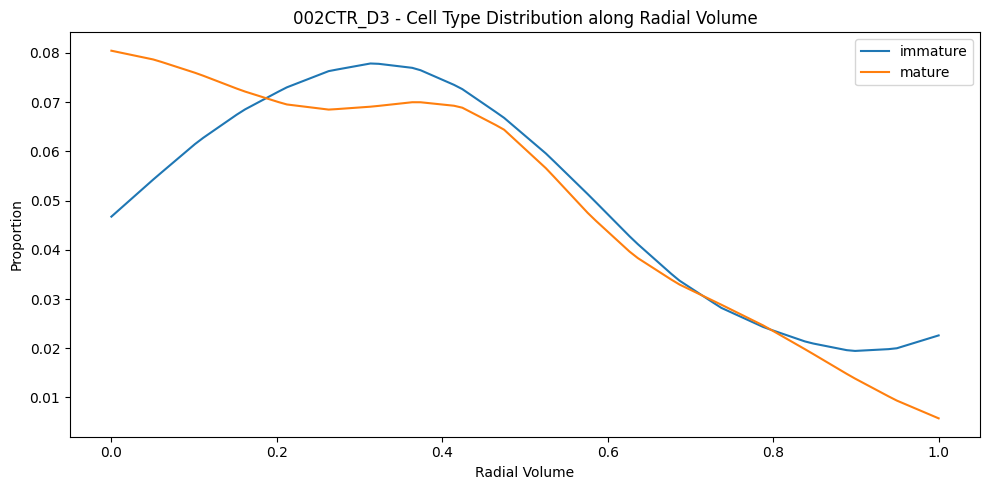

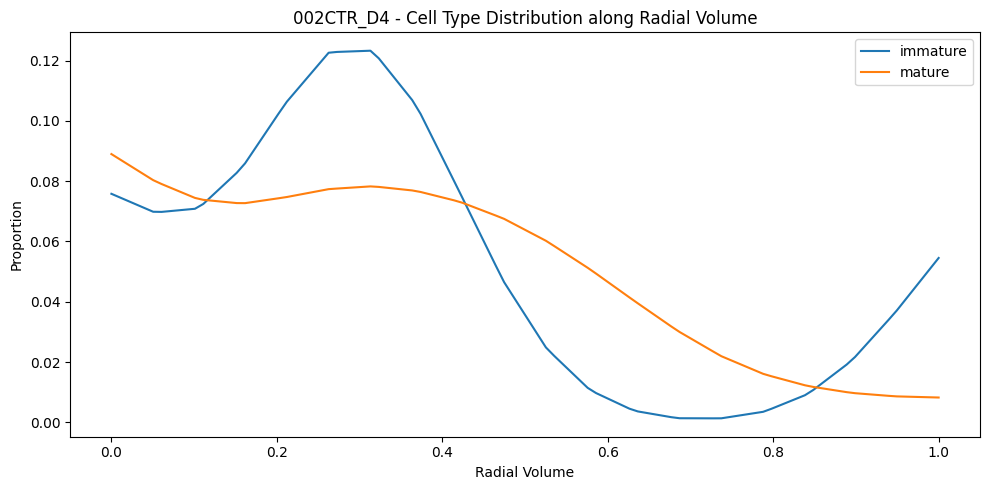

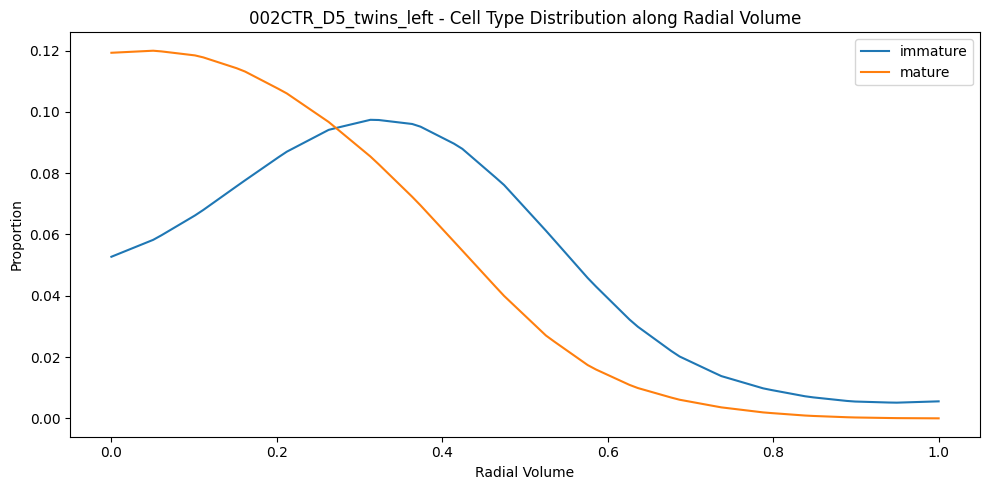

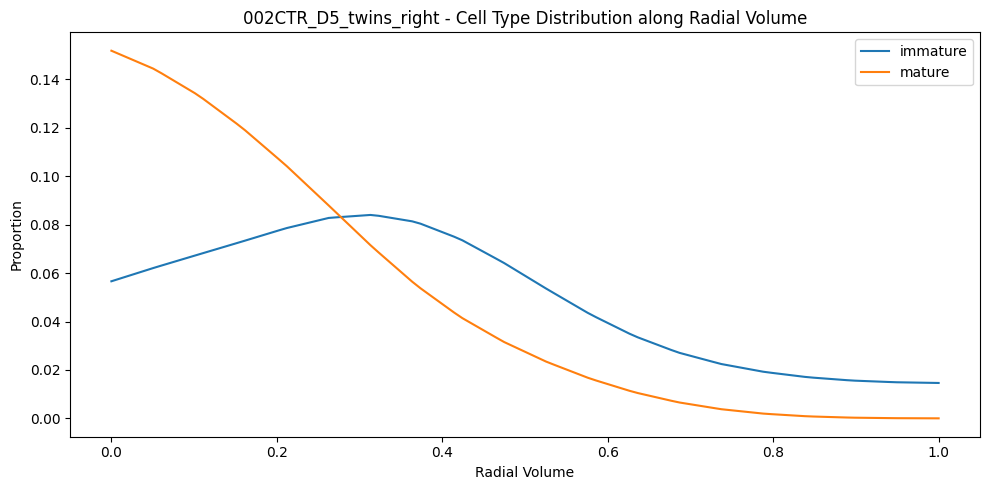

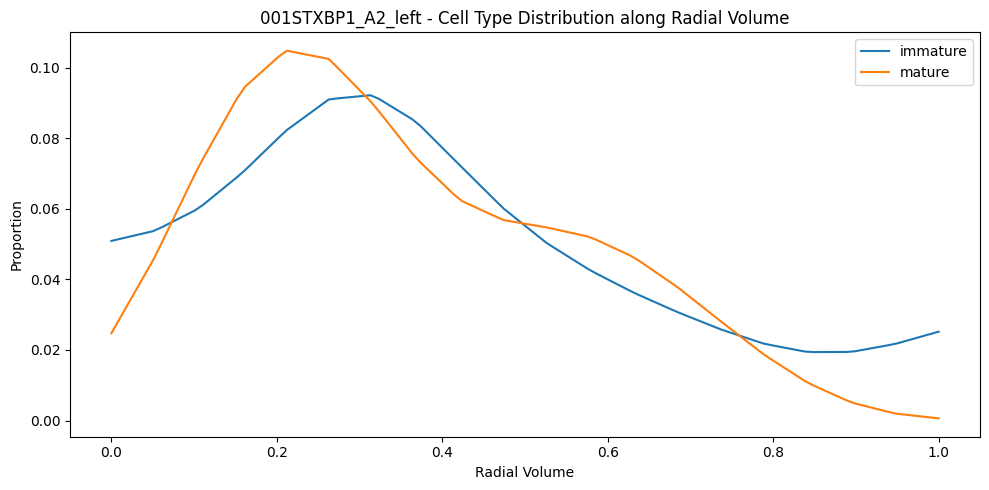

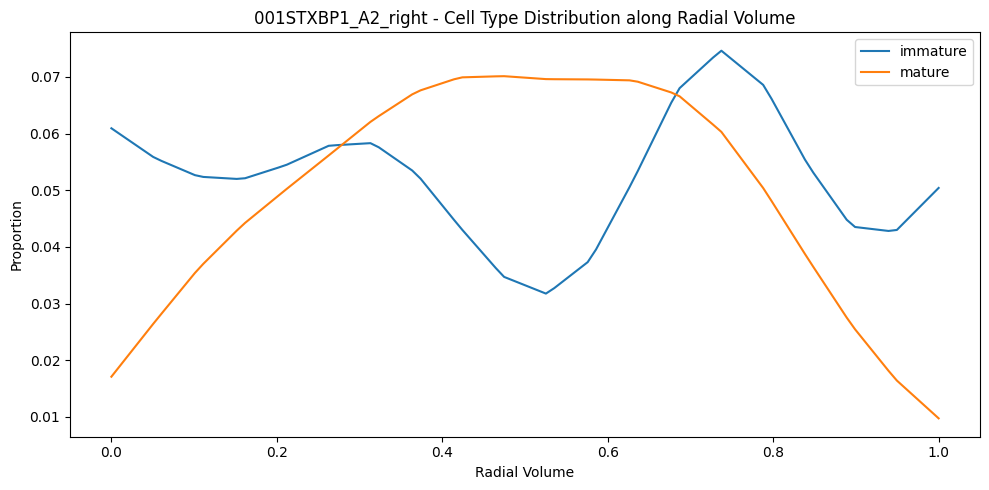

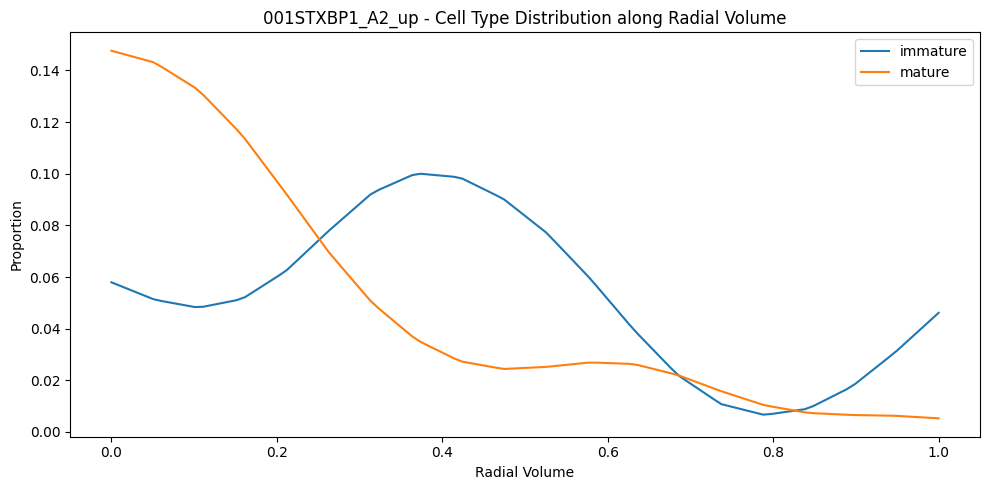

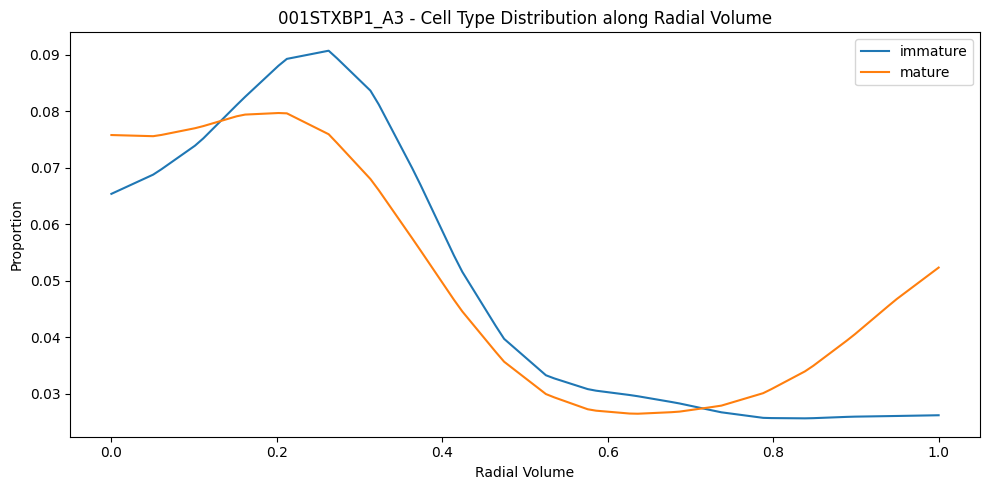

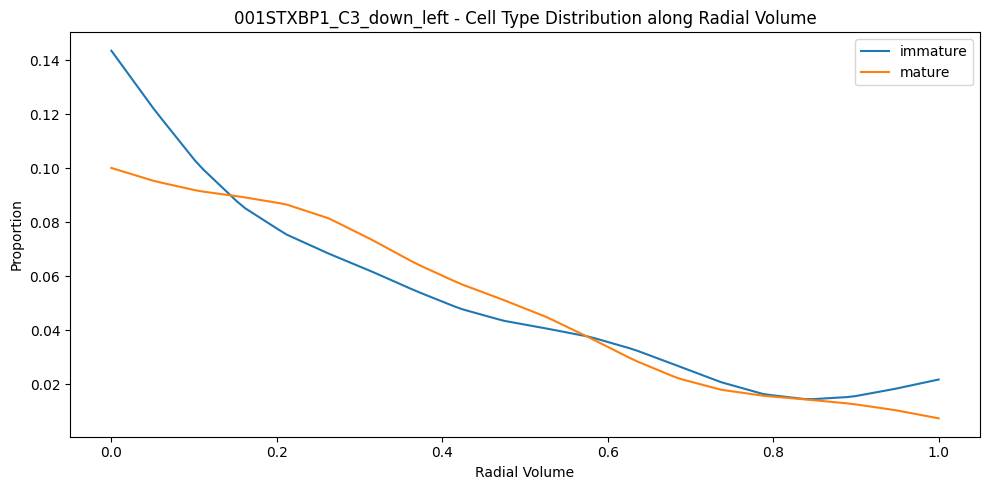

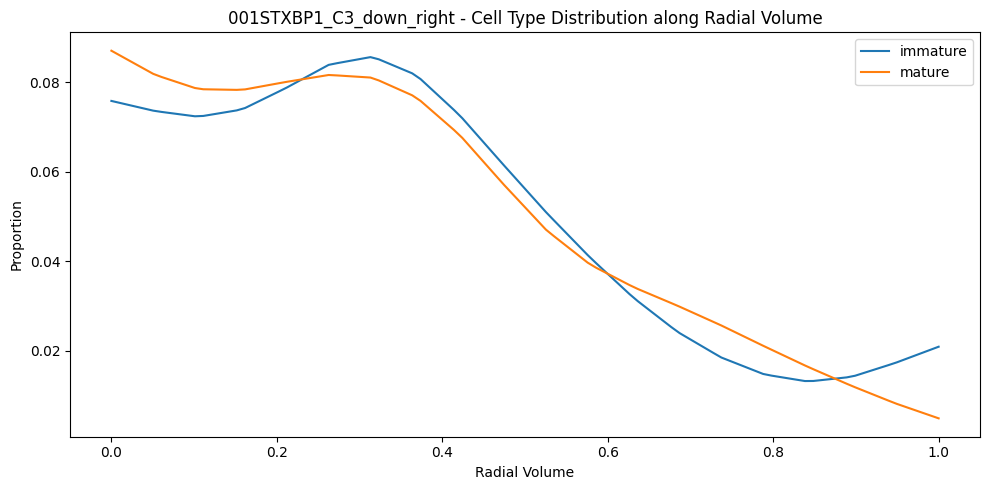

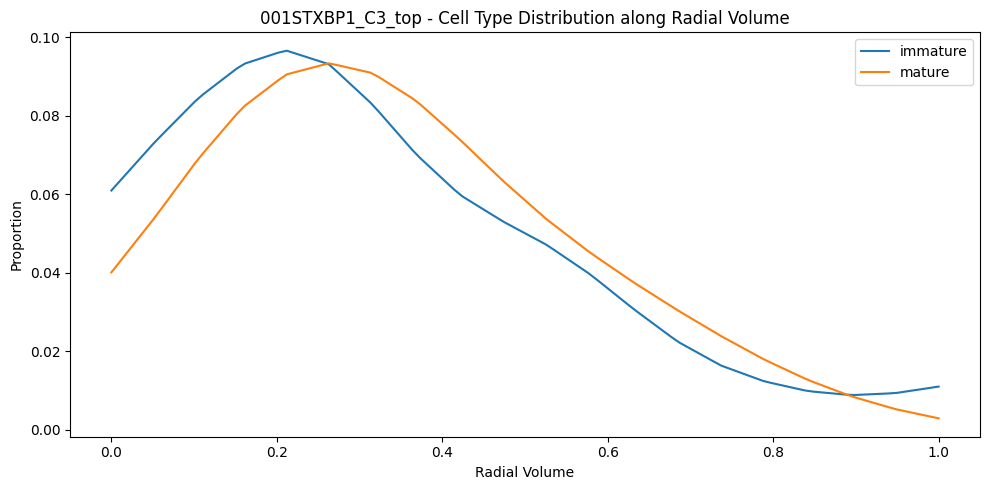

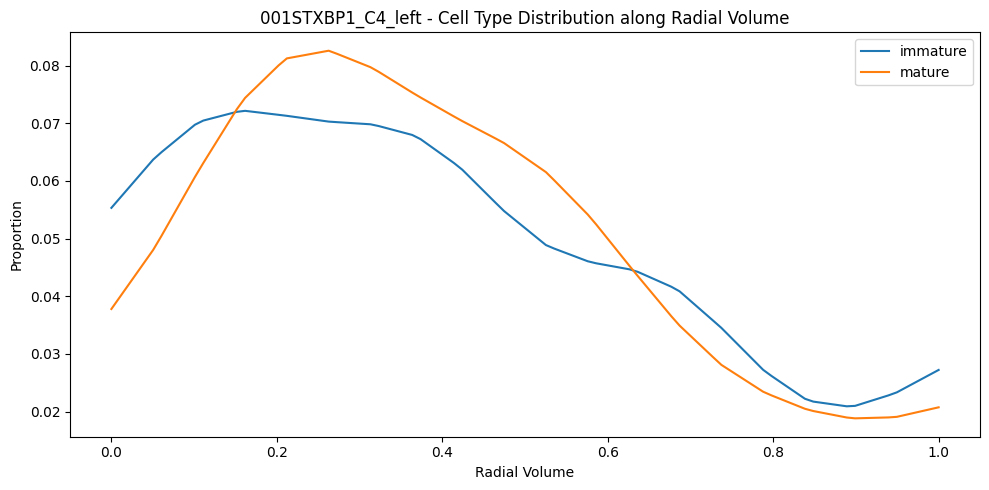

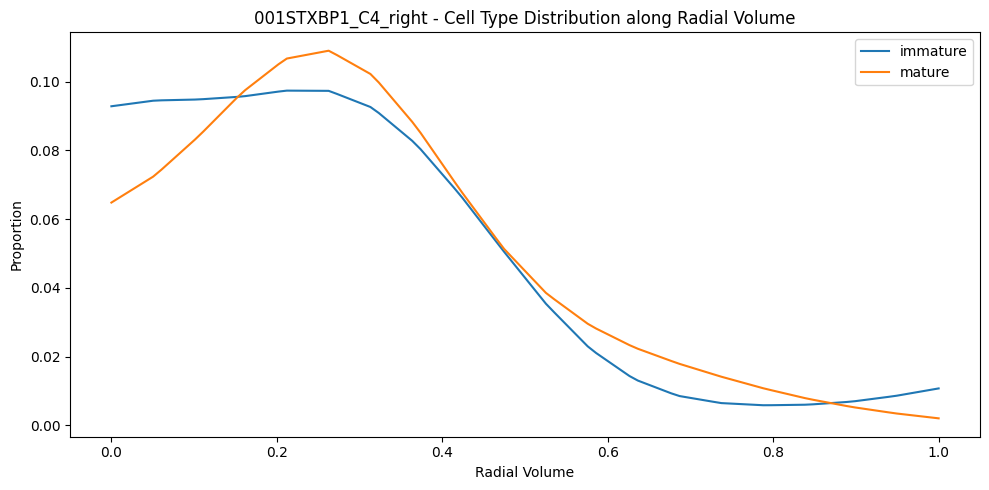

In [24]:
control_data, sick_data = proj_copy.analyze_cell_distribution_along_axis(num_bins = NUM_BINS, normalize_counts=True, normalize_axis=True, bandwidth=2, show_histogram=False, radial='spherical_volume')

### Condition analysis - graphs

ks pval: 0.9831368772656193
KS Statistic: 0.073


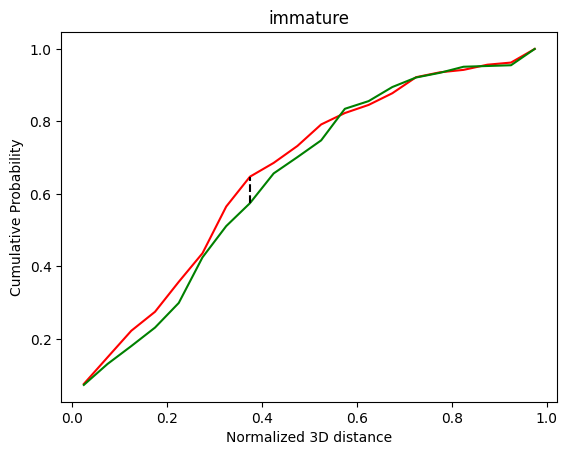

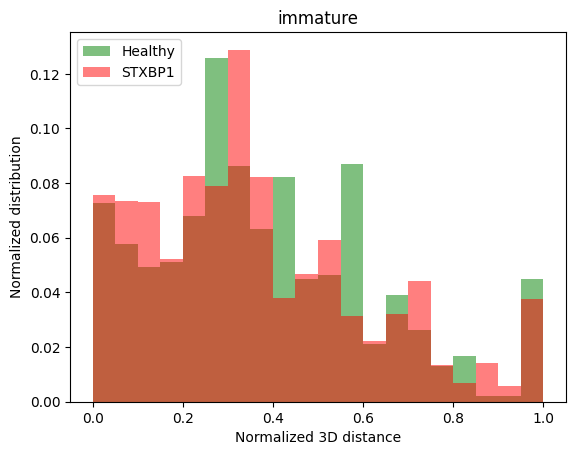

For type immature with 100 permutations, we got direct_p-value of: 5.941e-01


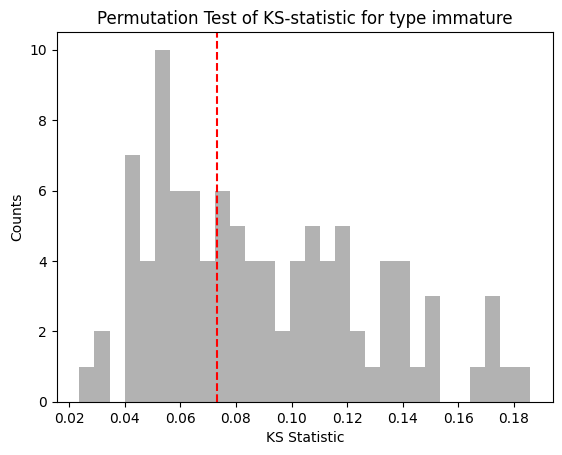

ks pval: 0.8319696107963263
KS Statistic: 0.106


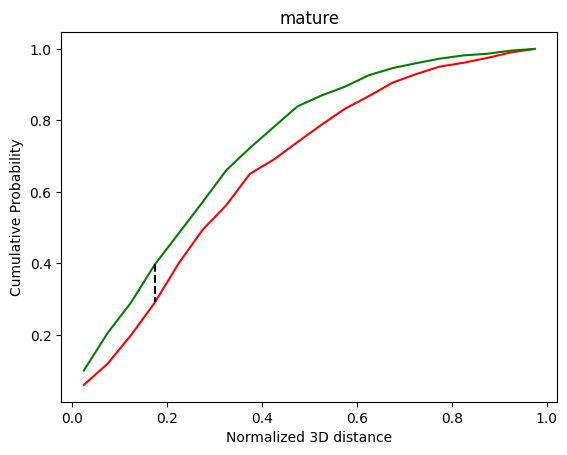

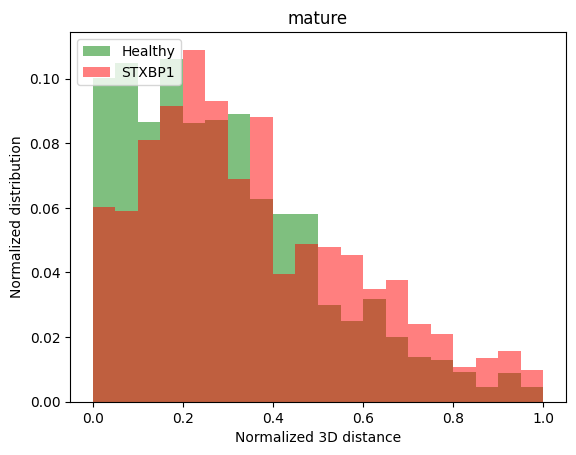

For type mature with 100 permutations, we got direct_p-value of: 2.079e-01


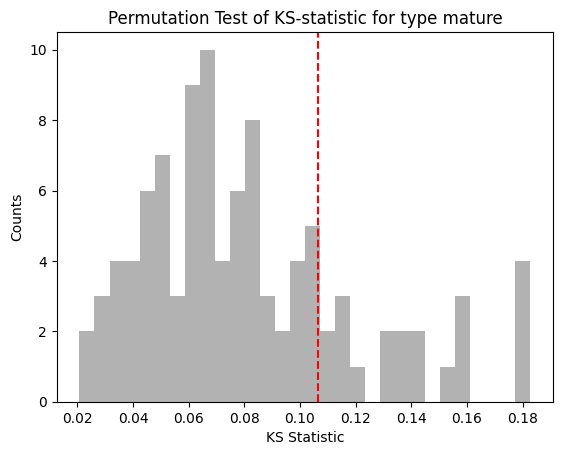

,type,KS-stat,P-value (straight calc),P-value (normal assumption)
0,immature,0.073076,0.594059,0.670167
1,mature,0.106369,0.207921,0.253076


In [25]:

results = []
for ct in ['immature', 'mature']:
    observed_stat, z_p_val, str_p_val = permutation_test(sick_data, control_data, cell_type=ct, n_permutations=100, plot_data_cdfs=True, plot_permutation_dist=True, var_name='radial distance (3D)', seed=1)
    results.append({
        "type": ct,
        "KS-stat": observed_stat,
        "P-value (straight calc)": str_p_val,
        "P-value (normal assumption)": z_p_val  
    })

res_df = pd.DataFrame(results)
res_df